<a href="https://colab.research.google.com/github/myriamgoyet/Unsuperviesed-ML--NorthFace-recommendation/blob/main/North_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ouverture du dataset

In [18]:
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
%pip install spacy -q

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import colormaps
from IPython.display import display, Markdown

# Import English using en_core_web_sm.load() as the dataset is in english
import en_core_web_sm

from bs4 import BeautifulSoup # pour faire un clean qui extrait les balises HTML
import re #la bibliothèque re permet de remplacer toutes les occurrences d'un motif (pattern) dans une chaîne par une autre chaîne.

import wordcloud
from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from collections import Counter



In [2]:
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Colab Notebooks/Jedha/Unsupervised ML/Projet North Face'

Mounted at /content/drive
North_Face.ipynb  sample-data.csv


In [3]:
file_path = "/content/drive/My Drive/Colab Notebooks/Jedha/Unsupervised ML/Projet North Face/sample-data.csv"

# Part 1 : Groups of products with similar descriptions

In [41]:
data = pd.read_csv(file_path)

#data = pd.read_csv("data/sample-data.csv")

data.head()

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
0   1  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Com...
1   2  Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through...
2   3  Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:...
3   4  Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippere...
4   5  Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repe...

In [42]:
data.shape

(500, 2)

In [43]:
data["product_name"] = data["description"].apply(lambda x: x.split(" - ")[0])
data.head()

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description               product_name
0   1  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Com...      Active classic boxers
1   2  Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through...  Active sport boxer briefs
2   3  Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:...        Active sport briefs
3   4  Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippere...         Alpine guide pants
4   5  Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repe...            Alpine wind jkt

In [44]:
data["description"][0] # On constate qu'il y a beaucoup de balises HTML, des caractères spéciaux, des mots composés séparés par des tirets

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

In [45]:
data["description"][20]

'Cap 1 t-shirt - Minimally styled but technically evolved for punishing expanses of hot country, our silky, ultra-breathable Capilene 1 T-Shirt is quick to wick and fast to dry. The rib-knit collar is soft against skin, and the generous hem is long enough to tuck in. Made from 3.7-oz 100% all-recycled polyester, with Gladiodor natural odor control for the garment and 15-UPF sun protection. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Silky soft Capilene 1 is the lightest of our technical baselayer fabrics</li> <li>"Fast-drying, highly breathable and sleek, it provides 15-UPF sun protection and can be worn either on its own or under layers in cooler temps"</li> <li>Rib-knit collar is soft against the skin</li> <li>Set-in sleeves</li> <li>Cut long enough to tuck in</li></ul><br><br><b>Fabric: </b>3.7-oz 100% recycled polyester with Gladiodor natural odor control for the garment and 15-UPF sun protection. Recyclable through the Common Threads Rec

## Preprocessing

In [46]:
# supprimer les balises html

def clean_balises(texte):
    soup = BeautifulSoup(texte, "html.parser")
    clean_text = soup.get_text()
    return clean_text

data["description_clean"] = data["description"].apply(clean_balises)
data["description_clean"][0]

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.Details: "Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry" "Exposed, brushed elastic waistband for comfort" 5-panel construction with traditional boxer back "Inseam (size M) is 4 1/2"""Fabric: 3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling ProgramWeight: 99 g (3.5 oz)Made in Mexico.'

In [47]:
import string
ponctuation = string.punctuation
ponctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
#pour remplacer les charactères non alphanumeric par des espaces
#data["description_clean"] = data["description_clean"].str.replace(r'[^a-zA-Z0-9]', ' ', regex=True)
#pour remplacer les charactères non alphabetiques par des espaces
data["description_clean"] = data["description_clean"].str.replace(r'[^a-zA-Z]', ' ', regex=True)
data["description_clean"][0]

'Active classic boxers   There s a reason why our boxers are a cult favorite   they keep their cool  especially in sticky situations  The quick drying  lightweight underwear takes up minimal space in a travel pack  An exposed  brushed waistband offers next to skin softness  five panel construction with a traditional boxer back for a classic fit  and a functional fly  Made of     oz      recycled polyester with moisture wicking performance  Inseam  size M  is         Recyclable through the Common Threads Recycling Program Details   Silky Capilene   fabric is ultralight  breathable and quick to dry   Exposed  brushed elastic waistband for comfort    panel construction with traditional boxer back  Inseam  size M  is         Fabric      oz      all recycled polyester with Gladiodor natural odor control for the garment  Recyclable through the Common Threads Recycling ProgramWeight     g      oz Made in Mexico '

In [49]:
data["description_clean"] = data["description_clean"].str.lower() #tout mettre en minuscules
data["description_clean"][0]

'active classic boxers   there s a reason why our boxers are a cult favorite   they keep their cool  especially in sticky situations  the quick drying  lightweight underwear takes up minimal space in a travel pack  an exposed  brushed waistband offers next to skin softness  five panel construction with a traditional boxer back for a classic fit  and a functional fly  made of     oz      recycled polyester with moisture wicking performance  inseam  size m  is         recyclable through the common threads recycling program details   silky capilene   fabric is ultralight  breathable and quick to dry   exposed  brushed elastic waistband for comfort    panel construction with traditional boxer back  inseam  size m  is         fabric      oz      all recycled polyester with gladiodor natural odor control for the garment  recyclable through the common threads recycling programweight     g      oz made in mexico '

In [50]:
# retirer les éventuels espaces superflues restant en début ou fin de chaine
data["description_clean"] = data["description_clean"].apply(lambda x: x.strip())
data["description_clean"][0]

'active classic boxers   there s a reason why our boxers are a cult favorite   they keep their cool  especially in sticky situations  the quick drying  lightweight underwear takes up minimal space in a travel pack  an exposed  brushed waistband offers next to skin softness  five panel construction with a traditional boxer back for a classic fit  and a functional fly  made of     oz      recycled polyester with moisture wicking performance  inseam  size m  is         recyclable through the common threads recycling program details   silky capilene   fabric is ultralight  breathable and quick to dry   exposed  brushed elastic waistband for comfort    panel construction with traditional boxer back  inseam  size m  is         fabric      oz      all recycled polyester with gladiodor natural odor control for the garment  recyclable through the common threads recycling programweight     g      oz made in mexico'

In [51]:
# il reste encore beaucoup d'espaces doubles ou tripe:
data["description_clean"] = data["description_clean"].str.replace(r'\s+', ' ', regex=True) # \s+ pour remplacer un ou plusieurs espaces consécutifs par un seul espace
data["description_clean"][0]

'active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five panel construction with a traditional boxer back for a classic fit and a functional fly made of oz recycled polyester with moisture wicking performance inseam size m is recyclable through the common threads recycling program details silky capilene fabric is ultralight breathable and quick to dry exposed brushed elastic waistband for comfort panel construction with traditional boxer back inseam size m is fabric oz all recycled polyester with gladiodor natural odor control for the garment recyclable through the common threads recycling programweight g oz made in mexico'

In [52]:
#faut il supprimer les chiffres?

## Tokenisation, lemmatisation et suppression des stop words

In [53]:
nlp = en_core_web_sm.load()

In [54]:
word_to_remove = ["oz","g"]
STOP_WORDS.update(word_to_remove)

In [55]:
## Tokenizer les descriptions clean, leammatiser les mots, retirer les STOP_WORDS
data["tokenized"] = data["description_clean"].apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])
data.head()

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description               product_name  \
0   1  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Com...      Active classic boxers   
1   2  Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through...  Active sport boxer briefs   
2   3  Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:...        Active sport briefs   
3   4  Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippere...         Alpine guide pants   
4   5  Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repe...            Alpine wind jkt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description_clean  \
0  active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five pa

In [56]:
#faut il rajouter des mots dans les STOP WORDS?

In [57]:
# réassembler les mots tokenisés
data["nlp_ready"] = data["tokenized"].apply(lambda x: " ".join(x))
data.head()

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description               product_name  \
0   1  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Com...      Active classic boxers   
1   2  Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through...  Active sport boxer briefs   
2   3  Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:...        Active sport briefs   
3   4  Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippere...         Alpine guide pants   
4   5  Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repe...            Alpine wind jkt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description_clean  \
0  active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five pa

## Analyse des mots restants au global

In [58]:
total_nlp_ready = " ".join(data["nlp_ready"])

In [59]:
total = " ".join(data["description"])

In [60]:
print("total: ",len(total))
print("total_clean: ",len(total_nlp_ready))

total:  561589
total_clean:  358381


In [61]:
total_nlp_ready

'active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin softness panel construction traditional boxer classic fit functional fly recycle polyester moisture wicke performance inseam size m recyclable common thread recycle program detail silky capilene fabric ultralight breathable quick dry expose brush elastic waistband comfort panel construction traditional boxer inseam size m fabric recycle polyester gladiodor natural odor control garment recyclable common thread recycle programweight mexico active sport boxer brief skin glory require movement boxer decide poach route form fit active sport boxer brief breathable polyester recycle fabric s fast wicke dry quickly spandex stretch seamless waistband soft leg edge win t roll bind gussete flat sew inseam size m offset prevent inner thigh chafe fly free smooth panel recyclable common thread recycle program detail stret

In [62]:
total

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

In [63]:
!pip install wordcloud -q

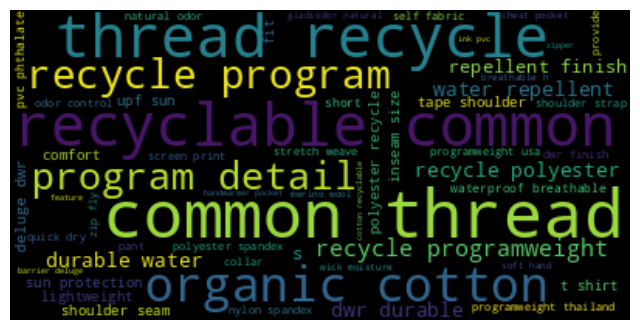

In [64]:
# Instanciate WordCloud
wd = WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(total_nlp_ready)

# Show word cloud with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## TF / IDF

In [65]:
# Create a tf-idf matrix where we can classify each word's importance.
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf = True) #smooth_idf évite des divisions par 0
X = vectorizer.fit_transform(data['nlp_ready'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32452 stored elements and shape (500, 3620)>

In [66]:
X.shape #500 articles, 3933 mots uniques après clean

(500, 3620)

In [67]:
# Create a dataframe of the tf-idf matrix
dense = X.toarray()
TFIDF_df= pd.DataFrame(dense,
             columns=vectorizer.get_feature_names_out(),
             index=["doc_{}".format(x) for x in range(500)] )
TFIDF_df.head()

abandon  ability  able  abrasion  abrasive  abroad  absolute  absorb  absorption  abstract  ...  young  yvon  zinger  zip    zipper  zippered  zippersfabric  zipping  zips  zone
doc_0      0.0      0.0   0.0       0.0       0.0     0.0       0.0     0.0         0.0       0.0  ...    0.0   0.0     0.0  0.0  0.000000  0.000000            0.0      0.0   0.0   0.0
doc_1      0.0      0.0   0.0       0.0       0.0     0.0       0.0     0.0         0.0       0.0  ...    0.0   0.0     0.0  0.0  0.000000  0.000000            0.0      0.0   0.0   0.0
doc_2      0.0      0.0   0.0       0.0       0.0     0.0       0.0     0.0         0.0       0.0  ...    0.0   0.0     0.0  0.0  0.000000  0.000000            0.0      0.0   0.0   0.0
doc_3      0.0      0.0   0.0       0.0       0.0     0.0       0.0     0.0         0.0       0.0  ...    0.0   0.0     0.0  0.0  0.151868  0.176515            0.0      0.0   0.0   0.0
doc_4      0.0      0.0   0.0       0.0       0.0     0.0       0.0     0.0         0.0       0.0  ...    0.0   0.0     0.0  0.0  0.147575  0.000000            0.0      0.0   0.0   0.0

[5 rows x 3620 columns]

In [68]:
TFIDF_df.shape

(500, 3620)

In [69]:
#trouver les mots les plus présents, donc les moins descriminants pour les ajouter éventuellement à la liste des stop words

# Sommez les valeurs TF-IDF pour chaque mot à travers tous les documents
tfidf_sum = TFIDF_df.sum(axis=0)

# Convertir la somme en un DataFrame pour faciliter le tri
tfidf_sum_df = tfidf_sum.to_frame(name='tfidf_sum')

# Trier les mots par leur importance totale en ordre décroissant
sorted_tfidf_sum_df = tfidf_sum_df.sort_values(by='tfidf_sum', ascending=False)

# Afficher les mots les plus importants
print(sorted_tfidf_sum_df.head(20))

            tfidf_sum
recycle     30.693236
pocket      27.922119
organic     25.923834
cotton      25.419496
polyester   23.965117
recyclable  22.873732
common      22.363247
thread      22.322147
fabric      18.734290
nylon       17.449177
soft        16.018042
shirt       15.566161
water       15.208661
seam        15.010100
zipper      14.192947
spandex     14.042984
dwr         14.041993
durable     13.872009
shoulder    13.545571
finish      13.485620


There is no need to add any word on the STOPWORD list.

## Create Clusters

Counter({np.int64(1): 160, np.int64(0): 63, np.int64(-1): 61, np.int64(6): 57, np.int64(2): 29, np.int64(9): 24, np.int64(5): 20, np.int64(13): 17, np.int64(15): 12, np.int64(4): 10, np.int64(3): 9, np.int64(7): 8, np.int64(12): 7, np.int64(8): 6, np.int64(11): 5, np.int64(10): 4, np.int64(14): 4, np.int64(16): 4})
Number of clusters: 17


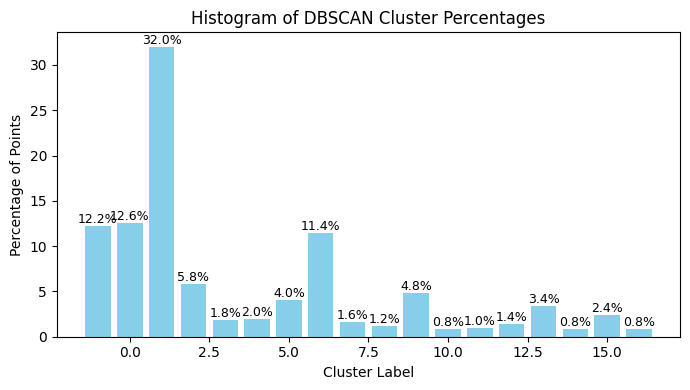

In [70]:
# Fit DBSCAN
db1 = DBSCAN(eps=0.7, min_samples=4, metric="cosine", algorithm="auto")
db1.fit(X)
labels = db1.labels_

# Count clusters and print
cluster_counts = Counter(labels)
print(cluster_counts)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

# Plot histogram of cluster percentages
total_points = len(labels)
cluster_percentages = {label: (count / total_points) * 100 for label, count in cluster_counts.items()}

plt.figure(figsize=(7, 4))
bars = plt.bar(cluster_percentages.keys(), cluster_percentages.values(), color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Percentage of Points')
plt.title('Histogram of DBSCAN Cluster Percentages')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Counter({np.int64(1): 160, np.int64(-1): 80, np.int64(0): 61, np.int64(5): 56, np.int64(2): 28, np.int64(8): 24, np.int64(4): 19, np.int64(12): 17, np.int64(13): 12, np.int64(3): 9, np.int64(10): 8, np.int64(6): 8, np.int64(11): 7, np.int64(7): 6, np.int64(9): 5})
Number of clusters: 14


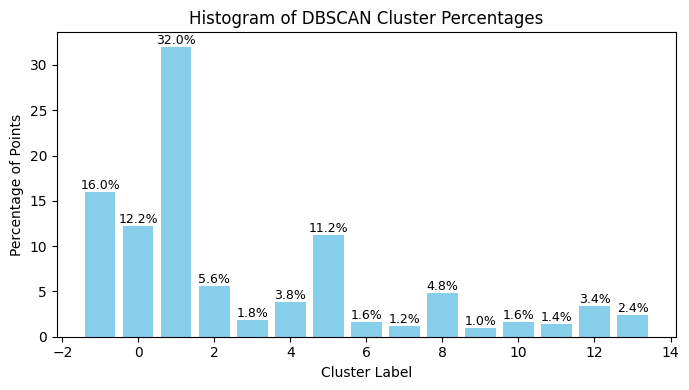

In [71]:
# Fit DBSCAN
db2 = DBSCAN(eps=0.7, min_samples=5, metric="cosine", algorithm="auto")
db2.fit(X)
labels = db2.labels_

# Count clusters and print
cluster_counts = Counter(labels)
print(cluster_counts)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

# Plot histogram of cluster percentages
total_points = len(labels)
cluster_percentages = {label: (count / total_points) * 100 for label, count in cluster_counts.items()}

plt.figure(figsize=(7, 4))
bars = plt.bar(cluster_percentages.keys(), cluster_percentages.values(), color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Percentage of Points')
plt.title('Histogram of DBSCAN Cluster Percentages')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Counter({np.int64(1): 164, np.int64(0): 63, np.int64(6): 57, np.int64(-1): 42, np.int64(2): 29, np.int64(11): 24, np.int64(5): 20, np.int64(8): 19, np.int64(19): 13, np.int64(4): 10, np.int64(3): 9, np.int64(9): 8, np.int64(14): 7, np.int64(17): 7, np.int64(10): 6, np.int64(13): 5, np.int64(12): 4, np.int64(16): 4, np.int64(7): 3, np.int64(15): 3, np.int64(18): 3})
Number of clusters: 20


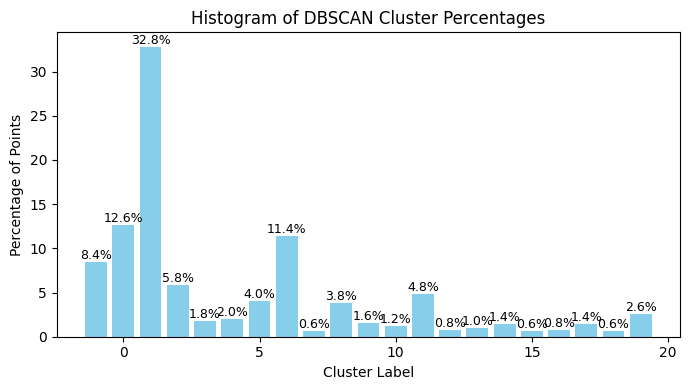

In [72]:
# Fit DBSCAN
db3 = DBSCAN(eps=0.7, min_samples=3, metric="cosine", algorithm="auto")
db3.fit(X)
labels = db3.labels_

# Count clusters and print
cluster_counts = Counter(labels)
print(cluster_counts)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)

# Plot histogram of cluster percentages
total_points = len(labels)
cluster_percentages = {label: (count / total_points) * 100 for label, count in cluster_counts.items()}

plt.figure(figsize=(7, 4))
bars = plt.bar(cluster_percentages.keys(), cluster_percentages.values(), color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Percentage of Points')
plt.title('Histogram of DBSCAN Cluster Percentages')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Clustering Results

<table>
  <thead>
    <tr>
      <th>Database</th>
      <th>Number of Clusters</th>
      <th>Outliers (%)</th>
      <th>Clusters with &lt;1%</th>
      <th>Smaller Cluster</th>
      <th>Largest Cluster (%)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>bd1</td>
      <td>17</td>
      <td>12.2%</td>
      <td>3</td>
      <td>0.8% (4 products)</td>
      <td>32% (160 prodcuts)</td>
    </tr>
    <tr>
      <td>db2</td>
      <td>14</td>
      <td>16%</td>
      <td>0</td>
      <td>1% (5 products)</td>
      <td>32% (160 products)</td>
    </tr>
    <tr>
      <td>db3</td>
      <td>20</td>
      <td>8.4%</td>
      <td>5</td>
      <td>0.6%% (3 products)</td>      
      <td>32.8% (164 products)</td>
    </tr>
  </tbody>
</table>


**bd1 provides the best segmentation** because the number of outliers is limited, ensuring that 88% of the products are distributed into clusters, and the clusters are big enough to contain at least 4 products.

## Analyse choosen cluster

In [74]:
clusters1 = db1.fit_predict(X.toarray())
data['cluster_db1'] = clusters1
data[['id', 'description', 'product_name','nlp_ready', 'cluster_db1']].head()

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description               product_name  \
0   1  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Com...      Active classic boxers   
1   2  Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through...  Active sport boxer briefs   
2   3  Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:...        Active sport briefs   
3   4  Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippere...         Alpine guide pants   
4   5  Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repe...            Alpine wind jkt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             nlp_ready  cluster_db1  
0  active classic boxer s reason boxer cult favorite cool especially sticky situation quick dry lightweight underwear take minimal space travel pack expose brush waistband offer skin softness panel construction traditional boxer classic fit functional fly recycl

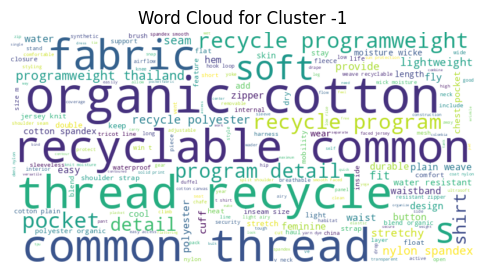

Cluster -1:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
10         Baby sunshade top                                                              Baby sunshade top - Soft, stretchy polyester fabric is fast wicking, quick drying and breathable <br><br><b>Details:</b><ul> <li>Lap shoulders relax the silhouette </li> <li>Extended roll-down cuffs accommodate growth spurts; drop hem waist provides extra coverage</li></ul><br><br><b>Fabric: </b>4.3-oz 100% polyester jersey. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(0 g 0 oz)<br><br>Made in Vietnam.
29       Cotton board shorts  Cotton board shorts - A classic in fabric and form, the 5.6-oz 100% organic cotton brushed canvas of these board shorts provides lightweight durability in and out of the water, with a pattern inspired by plantation-era cane field workshirts. A self-fabric waistband and flat-lying 2-button fly are cleanly styled, and the flapped patch pocket with metal button closure has double-needle stitched seams. Inseam (size 32) is 10"; outseam is 20". Recyclable through the Common Threads Recycling Prog...
37       Elias fz sweatshirt  Elias fz sweatshirt - Clean as a Wingate splitter. Our Elias is made from a welcoming blend of 95% organic cotton and 5% spandex in an athletic, climbing cut. The pockets rise above your harness and the stand-up neck adds a wind barrier to warm up an early season cragging session. The full-zip front makes it easy to take on and off between laps. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ultrasoft 95% organic cotton fleece has 5% spandex for stret...
38          Elias sweatshirt  Elias sweatshirt - The dirtbagger's complete wardrobe - wear it bouldering, working the slack line, and setting up a bivy out of view of the ranger's probing eyes. It has a hospitable mix of 95% organic cotton with 5% spandex for suppleness on dynamic moves. When clouds grow ominous, throw the 4-panel hood up to seal in your heat; keep your fingers warm and ready for crimping with the roomy kangaroo pouch pocket. Offset shoulder seams and a clean silhouette stay smooth under your packstraps ...
39             Fezzman shirt  Fezzman shirt - Look fresh even when you feel disheveled. Made with 65% lightweight, breathable, all-recycled polyester and 35% organic cotton plain weave, the Fezz won't wrinkle in the tightest corner of your travel duffel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Lightweight breathable all-recycled polyester/organic cotton plain weave</li> <li>Single chest pocket</li> <li>Modest tails</li></ul><br><br><b>Fabric: </b>2.9-oz 65% all-recycled pol...
..                       ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ...
428       Girl's beach skirt  Girl's beach skirt - This easy-to-wear skirt harmonizes with both sun and water. Made of a stretchy blend of 6-oz 82% nylon/18% spandex that dries quickly and flows lightly over skin, it features a fully elastic waist and a scooped hemline for a comfortable fit and easy ons/o

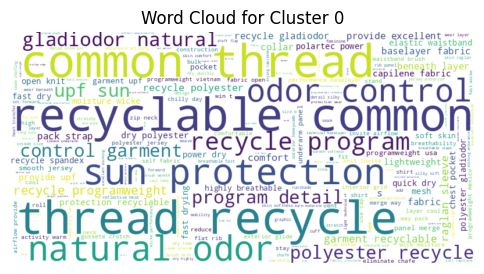

Cluster 0:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
0        Active classic boxers  Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Com...
1    Active sport boxer briefs  Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through...
2          Active sport briefs  Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:...
17               Cap 1 bottoms  Cap 1 bottoms - Spring skiing is as transient as the wind. Move fast, move light, and still stay dry with our lightest-weight Capilene performance baselayer. These bottoms wick perspiration, breathe, and dry quickly. Under a shell, they insulate without overheating. The waistband is brushed for softness, inseams are set forward to prevent chafe, and a gusseted crotch improves mobility. With a functional fly. Made from 3.7-oz 100% all-recycled polyester, with Gladiodor natural odor control fo...
18          Cap 1 boxer briefs  Cap 1 boxer briefs - On bivy or belay, the form-fitting Capilene 1 Boxer Briefs stay dry and comfortable. Made from 100% recycled polyester, the underwear excels at moisture-wicking and has Gladiodor natural odor control for the garment. Exposed elastic waistband is brushed for softness; the hem is coverstitched for a smooth glide beneath shorts or pants. Fully-functioning fly and supportive front panel keep you covered. 5 1/2" inseam (size M). Recyclable through the Common Threads Recycling...
..                         ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ...
487         Cap 1 graphic crew  Cap 1 graphic crew - The choice for rest days that include Ultimate Frisbee, longboarding the Avenues and a quick 9-mile-out-and-back trail run, this crew combines quick-drying, fast-wicking moisture-management with a street-worthy look. Silky-soft and livable, 

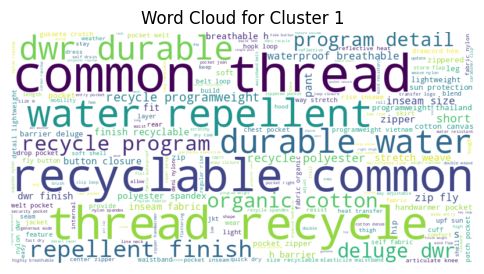

Cluster 1:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
3               Alpine guide pants  Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippere...
4                  Alpine wind jkt  Alpine wind jkt - On high ridges, steep ice and anything alpine, this jacket serves as a true "best of all worlds" staple. It excels as a stand-alone shell for blustery rock climbs, cool-weather trail runs and high-output ski tours. And then, when conditions have you ice and alpine climbing, it functions as a lightly insulated windshirt on the approach, as well as a frictionless midlayer when it's time to bundle up and tie-in. The polyester ripstop shell with a Deluge DWR (durable water repe...
5                 Ascensionist jkt  Ascensionist jkt - Our most technical soft shell for full-on mountain pursuits strikes the alpinist's balance between protection and minimalism. The dense 2-way-stretch polyester double weave, with stitchless seams, has exceptional water- and wind-resistance, a rapid dry time and superb breathability. Pared-down detailing provides everything you need and nothing more: a 3-way-adjustable, helmet-compatible hood; a reverse-coil center-front zipper with a DWR (durable water repellent) finish; l...
8       Baby micro d-luxe cardigan  Baby micro d-luxe cardigan - Micro D-Luxe is a heavenly soft fabric with down-to-earth applications. This cardigan is made from a quick-drying, durable 4.6-oz 100% polyester (87% recycled) microdenier fleece that is lightweight and breathable so it can work as a top or midlayer. A wind flap backs the zip front, while the hood has covered-elastic side trim to bundle babies in deep warmth. With slash-style patch pockets, color-coordinating elbow patches and soft self-fabric cuffs. Recyclable t...
11                  Baggies shorts  Baggies shorts - Even Baggies, our most popular shorts for anything, or nothing, occasionally need an update. This season we've increased the inseam length. Their casual fit, quick-drying water-repellent nylon and elasticized waistband with an internal drawstring remain the same as ever. Other features include a polyester mesh lining, a rear snap pocket and front pockets (with self-draining mesh corners) positioned to reduce drag in the water. Inseam (size M) is 7". Recyclable through the Co...
..                             ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ...
483          Borderless trek pants  Borderless trek pants - The Ruby Crest trail runs two directions: up and down. To keep you moving in this shifting terrain, our Borderless Trek Pants have a stretchy blend of 95% nylon (60% recycled) and 5% spandex, woven into a soft,

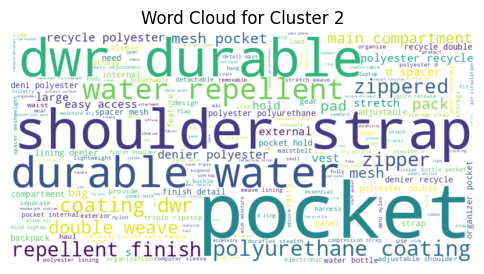

Cluster 2:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
6                   Atom  Atom - A multitasker's cloud nine, the Atom plays the part of courier bag, daypack and carry-on. Its teardrop shape provides the support of a daypack by positioning the load behind your shoulder, and the single-strap design makes getting to the goods simple - just spin it around front. The large zippered main pocket has internal zippered mesh and stretch-woven pockets. A convenient zippered pocket on the shoulder strap is lined to protect valuables. Breathable, moisture-moving 3-D spacer mes...
30             Crosstown  Crosstown - Crosstown or cross-country, this fully featured commuter backpack ensures that your life stays organized whether you're office-bound, hiking the steep and narrow, or somewhere in the global commute. Inside its zippered main compartment, it features a suspended, self-adjusting padded laptop sleeve that handles a 15" to 17"" laptop. A secondary zippered compartment opens to a portable office organizer system. With a front catch-all sleeve (with hidden zipper) that provides easy acc...
41           Freewheeler  Freewheeler - This sturdy wheeled bag holds a week's worth of clothes and keeps boots or dirty gear in a separate compartment, a floating baffle separating the two. The zippered, easy-access end compartment and internal mesh toiletry pocket fight the forces of chaos to keep you organized. A light-colored lining makes it easy to see what you have stashed inside. Structurally, impact-resistant skidplates and the tough-as-nails molded bottom pan stand up to brutal treatment, while smooth-rollin...
52       Guidewater vest  Guidewater vest - Find the tippet, tool or fly box you need without taking your eyes of that big bank feeder. The Guidewater Vest replaces old school flap-covered pockets with a curved-zipper panel organization system for improved visibility of, and access to, vest contents with one single-handed motion. The angler-designed storage system conveniently and intuitively organizes everything you need and puts it at your fingertips. Our latest version features dual front closures (zipper and clas...
53    Highwater pfd vest  Highwater pfd vest - The constant boat angling dilemma: You know you should wear one, but who wants to fish all day in a life vest? Here's the solution: The Highwater Vest is a full-on USCG-approved Type III personal floatation device that's also a trim-fitting, functional fishing vest. Better yet, it's so comfortable and allows such a wide range of motion, you'll forget you're even wearing a PFD. The Highwater features Gaia foam that's lighter than conventional foam and free of CFC-ozone-de...
54        Hip chest pack  Hip chest pack - Ready to go vest free? This is the classic alternative. Designed to be worn either on the hips or at the chest (hence the name), this bombproof, streamlined pack is the ultimate in functional simplicity. Made from tough, polyurethane-coated polyester (47% recycled) double-weave, the Hip Chest Pack has DWR (durable water repellent) coated zippers with custom fish pulls, a side magnetic loop, retractor attachment bar and quick-release DuraFlex Stealth-V buckle. More features: ...
82      Lw travel duffel  Lw travel duffel - This wanderer's bag is large enough to hold the contents of your life without getting in the way. A large zippered entry to the roomy main compartment makes it easy to toss in a few essentials or stuff it to the max. An exterior side zipper pocket organizes small items; the top pocket

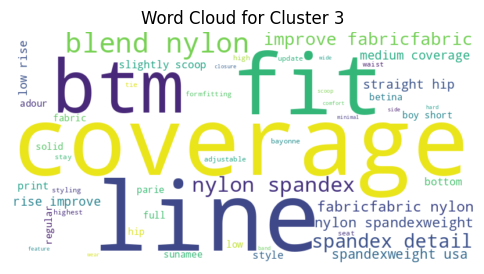

Cluster 3:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
7    Print banded betina btm                                       Print banded betina btm - Our fullest coverage bottoms, the Betina fits highest across the hips with a slightly scooped, lined front. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Fullest coverage bottom</li> <li>"Fits highest across hips, full front and back coverage"</li> <li>Regular rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in USA.
218          Solid adour btm                                                                                     Solid adour btm - Adours feature a scooped, low-rise front (lined) and medium coverage in back. Our improved fabric blend is made of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Medium coverage</li> <li>Lined front</li> <li>Slightly scooping front</li> <li>Low rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(43 g 1.5 oz)<br><br>Made in USA.
219         Solid betina btm                                 Solid betina btm - Our fullest coverage bottoms, the Betina fits highest across the hips with a slightly scooped, lined front. Made from a hard-wearing blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Fullest coverage bottom</li> <li>"Fits highest across hips, full front and back coverage"</li> <li>Regular rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in USA.
239        Print bayonne btm                                          Print bayonne btm - The low-rise Bayonne Bottoms have adjustable side ties and minimal seat coverage - less than all of our other styles. Lined front. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Least coverage</li> <li>Lined front</li> <li>Adjustable side-tie closures</li> <li>Low rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(43 g 1.5 oz)<br><br>Made in USA.
253         Solid paries btm  Solid paries btm - The boy-short-style Paries Bottoms fit low and straight across the hips. With wide sides for comfort, a lined front and full seat coverage. Made from our improved fabric blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Boy-short style</li> <li>Lined front</li> <li>Fits low and straight across hips</li> <li>Updated waist styling</li> <li>Medium coverage in front; full back coverage</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% s...
254        Solid sunamee btm                                                                        Solid sunamee btm - Stay-put Sunamees fit straight across the hips, with full coverage in back. Lined front. Made from a formfitting blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Full coverage</li> <li>Lined front</li> <li>Fits straight across hips</li> <li>Regular rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(43 g 1.5 oz)<br><br>Made in USA.
260         Print paries btm  Print paries btm - Styled like a boy short, our Paries Bottoms fit low and straight across the hips, with medium coverage in front and full coverage in back. Lined front. Made from our improved fabric blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Boy-short st

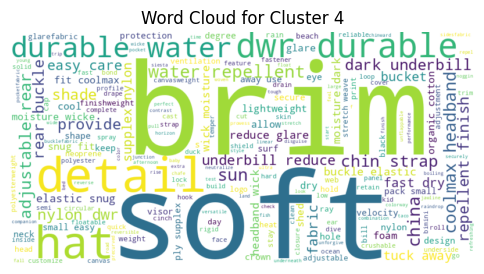

Cluster 4:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
9    Baby sun bucket hat  Baby sun bucket hat - This hat goes on when the sun rises above the horizon, and stays on when raindrops start falling. Its made from an ultra-durable 4-ply, 4.2-oz Supplex nylon fabric with a DWR (durable water repellent) finish, and reverses to either a contrasting solid color or print. A soft tuck-away chin strap with a hook-and-loop fastener holds securely without chafing young jawlines. Packs small; easy care.<br><br><b>Details:</b><ul> <li>"Lightweight Supplex nylon is soft, dries fast...
12          Beach bucket  Beach bucket - Whenever you're at the junction of water and land, neutralize the sun's unforgiving rays with the wide brim and soft design of our versatile Beach Bucket. It has a durable, semi-rigid foam bill that is black underneath and casts refreshing 360-degree shade. The 6.8-oz 100% stretch-woven nylon fabric looks and feels like soft canvas, but provides water-shedding, fast-drying performance. Details: a moisture-wicking Coolmax headband, soft chin strap and an adjustable rear buckle ...
16            Bucket hat  Bucket hat - Besides its shade-casting prowess, the Bucket provides perfect eye cover after an extra-large fish taco fest. It's made from soft, fast-drying 100% nylon with a water-shedding finish to repel rain and ocean spray. The Bucket Hat features a time-tested design with a linear crown, crushable brim and ventilation holes to keep your noggin from hard-boiling. It also rolls into its own inside pocket.<br><br><b>Details:</b><ul> <li>"Lightweight, fast-drying, easy-care fabric"</li> <li>...
73              Logo hat  Logo hat - Your unflappable road-tripping companion - this 100% organic cotton hat disguises bed head, cuts glare when you're checking surf, and pulls chinward for an afternoon siesta. The go-anywhere design has a precurved brim, a rear elastic strap with nylon webbing for adjustability and a moisture-wicking headband for comfort. The low profile ensures a reliable bond during rogue gusts.<br><br><b>Details:</b><ul> <li>"Comfortable, 100% organic cotton fabric holds its shape"</li> <li>Shape...
134            Surf brim  Surf brim - Whether you're paddling back out or waiting on the next set, our Surf Brim keeps your cranium cool and your eyes shaded. It is a quick-drying, secure hat with full-coverage protection. The 360-degree floatable foam brim shades vulnerable skin and allows clean duck dives; the dark underside reduces glare. Fast-drying 100% nylon with a DWR (durable water repellent) finish and two drain holes shed water. Stay-put details include a soft neoprene headband, a tuck-away chin strap and a...
148         Velocity cap  Velocity cap - When you're running the parched, open slopes of Black Mountain, our Velocity Cap keeps your head in a current of cool air. It has built-in breathability through its mesh panels and a wispy crown made from 100% polyester to deflect heat. The 5-panel design allows a close fit that customizes via a low-profile elastic and buckle closure. A wicking Coolmax headband keeps sweat out of your eyes and a dark underbill shades them from glare.<br><br><b>Details:</b><ul> <li>Adjustable r...
343       Velocity visor  Velocity visor - For going all-out on the trail or staying put on the beach, the Velocity Visor provides all-day sun protection for about the weight of your shoelaces. It shades the eyes and face from scorching rays or pounding rain but allows complete ventilation to keep your noodle from becoming al de

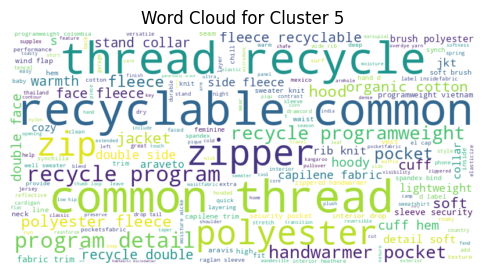

Cluster 5:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
13       Better sweater jkt  Better sweater jkt - June nights camped out in New Mexico's Navajo country are starry and cold. Layer up in the softest fleece we've spun to date. Made from high-performance, sweater-knit polyester fleece, the Better Sweater is warm as wool and technically proficient. The stand-up collar has a zipper garage, and handwarmer pockets keep your fingers cozy. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Soft fleece has a sweater-knit face, fleeced inter...
61               El cap jkt  El cap jkt - Resistant to hard play but irresistible against the skin, our El Cap Jacket is lightweight, quick-drying and way cozy. The 5.7-oz 100% polyester (78% recycled) double-faced fleece is brushed inside and provides moisture-wicking performance. The full-zip design has handwarmer pockets, raglan sleeves for mobility, spandex binding at the arms and waist for a secure fit and a reflective patch for high visibility between the shoulders. Recyclable through the Common Threads Recycling ...
65          Synch marsupial  Synch marsupial - The roomy kangaroo-style front pocket on the Kids' Synchilla Marsupial lets them take their rock, leaf and feather collection wherever they go. Made of ultra-soft 7.6-oz 100% polyester (85% recycled) double-faced fleece; it features a reflective collar stand for high visibility, a deep front zip, shape-holding elasticized cuffs and waist and a hand-me-down ID label inside. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Made from sof...
159            Aravis hoody  Aravis hoody - The Lochsa River season ushers in snowmelt wavetrains and ice cream headaches. Warm up at the take-out with the Aravis Hoody - a cozy full-zip hooded cardigan made from exceptionally soft, brushed polyester. It has a shaped fit, Capilene-trimmed edges and a fitted hood. Pockets: two zippered handwarmers, a left-sleeve security and interior drop-ins. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Made from cozy soft polyester fleece</li>...
160              Aravis jkt  Aravis jkt - The highly adaptable Aravis Jacket eases the transition from icy hibernation to full-fledged charging. The lightweight jacket's dense, double-sided polyester fleece fabric (100%) is brushed for softness; Capilene 3 fabric trims the neck, pockets, cuffs and hem lending a clean style. Full front zipper and stand-up collar preserve warmth. Zippered handwarmer pockets shield chilled paws; interior drop-in pockets and zippered sleeve security pocket stash keys and snacks. Recyclable ...
165      Better sweater jkt  Better sweater jkt - The Better Sweater Jacket has all the lightweight, moisture-wicking warmth of a high-performance fleece but travels incognito as a dignified sweater. The richly textured, cross-dyed fabric has a soft fleece interior and a heathered sweater-knit face. Toasty Capilene 3 fabric trims the wind flap, cuffs, hem and pockets. With a stand-up collar, zippered handwarmer pockets, interior drop-in pockets and a zippered left-sleeve pocket. Recyclable through the Common Threads Rec...
179              El cap jkt  El cap jkt - Stuff the El Cap Jacket into your pack on your next Winds walkabout - its lightweight, layerable nature makes it a classic. The double-faced and brushed polyester fleece (78% recycled) wicks moisture and dries quickly. The feminine contouring includes on-seam handwarmer

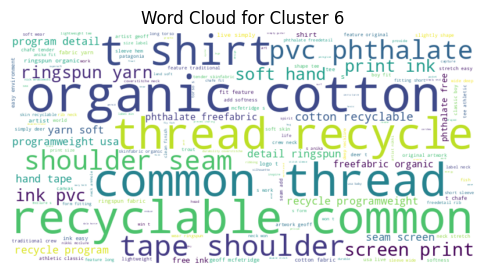

Cluster 6:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
25            City by the sea t-shirt  City by the sea t-shirt - Illustrating the renaissance of sea-inspired, community living, artist Geoff McFetridge's work adorns the City-By-The-Sea T-Shirt. Lightweight, 100% organic cotton fabric is ringspun for softness. Taped shoulder seams prevent chafing. PVC- and phthalate-free inks are easier on the environment. The tee is Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</li> <li>Taped shoulder seams</li> <li>Scre...
35                   Dragoons t-shirt  Dragoons t-shirt - These dragoons have dropped their weapons in favor of big wave guns. Artist Geoff McFetridge's work creates a peaceful quiver on the Dragoons T-Shirt. The tee is made from 100% organic cotton fabric; PVC- and phthalate-free screen print inks are easier on the environment. The lightweight tee has ringspun yarns and taped shoulder seams for a soft hand. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</l...
40                Fish frenzy t-shirt  Fish frenzy t-shirt - Dependent on free-flowing currents, the Salmon's extraordinary cycle of life perseveres with the Fish Frenzy T-Shirt. Washington-based artist Nikki McClure's work appears on the tee's 100% organic cotton canvas. Ringspun fabric yarns and taped shoulder seams create a soft hand. PVC- and phthalate-free inks are easier on the environment. The shirt is recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</...
55                    Iceberg t-shirt  Iceberg t-shirt - The effects of global warming run deep, depicted here on the Iceberg T-Shirt with artwork by wood block print artist Nick Wroblewski. Made from 100% ringspun organic cotton and printed with PVC- and phthalate-free inks, the shirt has taped shoulder seams for added comfort. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</li> <li>Taped shoulder seams</li> <li>Screen-print inks are PVC- and phthalate-fre...
57                   '73 logo t-shirt                                                                              '73 logo t-shirt - Soft-wearing ringspun organic cotton; Screen-print inks are PVC- and phthalate-free<br><br><b>Details:</b><ul> <li>Ribbing at neck stretches for easy on/off</li> <li>Screen-printed size label on back of neck won't chafe tender skin</li></ul><br><br><b>Fabric: </b>4.4-oz 100% organic cotton. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(103 g 3.6 oz)<br><br>Made in USA.
62                Flying fish t-shirt                                                                           Flying fish t-shirt - Soft-wearing ringspun organic cotton; Screen-print inks are PVC- and phthalate-free<br><br><b>Details:</b><ul> <li>Ribbing at neck stretches for easy on/off</li> <li>Screen-printed size label on back of neck won't chafe tender skin</li></ul><br><br><b>Fabric: </b>4.4-oz 100% organic cotton. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(103 g 3.6 oz)<br><br>Made in USA.
63               Gpiw classic t-shirt                                                                          Gpiw classic t-shirt - Soft-wearing ringspun organic cotton; Screen-print inks are PVC- and phthalate-free<br><br><b>Details:</b><ul> <li>Rib

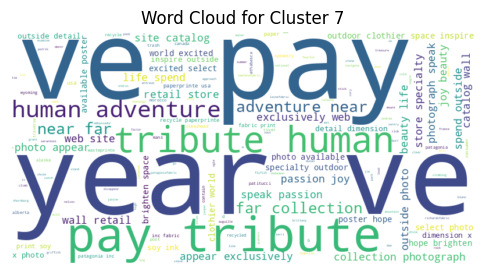

Cluster 7:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
47          Going big in b.c. poster  Going big in b.c. poster - One mans trash is another mans treasure. Orry Grant taking it out on Trash Chutes. Nelson, B.C. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos ...
68      Lead an examined life poster  Lead an examined life poster - Guanacos standing sentry in Patagonia, Chile. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos available to you as posters. We hope they brig...
237          Wyoming climbing poster  Wyoming climbing poster - Max Factor, 5.11c. Vedauwoo, Wyoming. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos available to you as posters. We hope they brighten up your ...
318              Symmetry w16 poster  Symmetry w16 poster - Bill Serantoni ice climbs Fearful Symmetry in Alberta Canada. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos available to you as posters. We hope th...
331   Traversing auguille d'entreves  Traversing auguille d'entreves - Janine Patitucci navigates a summer traverse of the Aiguille dEntr?ves. Mount Blanc Massif, France. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make sele...
370  Sticks 'n stones morocco poster  Sticks 'n stones morocco poster - Patagonia Rock Ambassador Brittany Griffith and Jonathan Thesenga on the approach to Tout Pour Le Club (IV 5.12d). High Atlas Mountains, Morocco. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around...
395    Wild steelhead, alaska poster  Wild steelhead, alaska poster - Catch and release. A steelhead disappears into the cold, clear waters of Alaskas Eagle River. For 30 years we've paid tribute to human adventures both near and far with a collection of pho

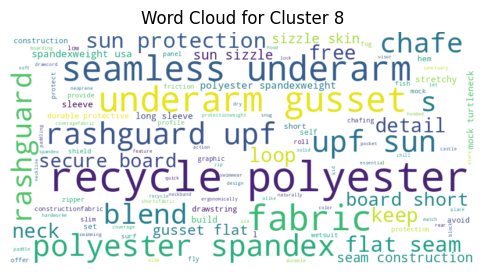

Cluster 8:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
74   L/s hooded rashguard  L/s hooded rashguard - The 30-UPF fabric of our Long-Sleeved Rashguard keeps the sun from sizzling your skin. Made from a durable and protective blend of 84% all-recycled polyester/16% spandex. With seamless underarm gussets and chafe-free construction. The drawstring loop at front secures to board shorts.<br><br><b>Details:</b><ul> <li>All-recycled polyester rashguard has 30-UPF sun protection</li> <li>Sun-blocking 3-panel hood with built-in neoprene visor snugs with locking drawcord</li> <...
76          L/s rashguard  L/s rashguard - The 30-UPF fabric of our Long-Sleeved Rashguard keeps the sun from sizzling your skin. Made from a durable and protective blend of 84% all-recycled polyester/16% spandex. With seamless underarm gussets and chafe-free construction. The drawstring loop at front secures to board shorts.<br><br><b>Details:</b><ul> <li>Recycled polyester (100%) rashguard has 30-UPF sun protection </li> <li>Mock turtleneck protects neck from sun and rolls over to shield from wetsuit zipper</li> <li...
194         L/s rashguard  L/s rashguard - The 30-UPF fabric of our Long-Sleeved Rashguard keeps the sun from sizzling your skin. With a slim neckline, wide underarm panels and ergonomically placed seams. Made from a durable blend of 5.8-oz 84% all-recycled polyester/16% spandex.<br><br><b>Details:</b><ul> <li>Stretchy all-recycled polyester/spandex fabric offers protection against chafing and sun</li> <li>30-UPF sun protection</li> <li>Mock neck and set-in long sleeves with seamless underarm gussets and flat-seam con...
225         S/s rashguard  S/s rashguard - The 30-UPF fabric of our Short-Sleeved Rashguard keeps the sun from sizzling your skin. With a slim neckband, seamless underarm gussets and set-in sleeves for chafe-free paddling. Made from a soft fabric blend of 84% all-recycled polyester/16% spandex in solid colors that match our swimwear and board shorts.<br><br><b>Details:</b><ul> <li>Stretchy all-recycled polyester/spandex fabric offers protection against chafing and sun</li> <li>30-UPF sun protection</li> <li>Mock neck ...
360         S/s rashguard  S/s rashguard - The 30-UPF fabric of our Short-Sleeved Rashguard keeps the sun from sizzling your skin. Made from a durable and protective blend of 84% all-recycled polyester/16% spandex. With seamless underarm gussets and chafe-free construction. The drawstring loop at front secures to board shorts.<br><br><b>Details:</b><ul> <li>Recycled polyester (100%) rashguard has 30-UPF sun protection</li> <li>Mock turtleneck protects neck from sun and rolls over to shield from wetsuit zipper</li> <li...
417             Rashguard  Rashguard - Sanctuary from sun and chill alike: This hardworking top is made of a stretchy blend of quick-drying, 5.8-oz 84% polyester (100% recycled)/16% spandex with built-in 30-UPF sun protection. Its seamless underarm gussets let kids move naturally during swimming, boarding or castle-building. A low-profile mock turtleneck design provides neck coverage; flat-seam construction throughout keeps the action friction-free.<br><br><b>Details:</b><ul> <li>Our rashguard features a stretchy blen...

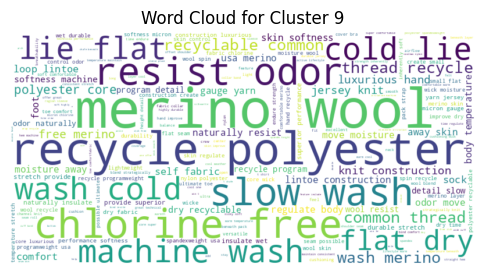

Cluster 9:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
78        Lw endurance ankle socks  Lw endurance ankle socks - Fast-forward pursuits, like riding the White Rim in a day, have miles of inspiration followed by moments of doubt. At least your feet will stay consistently cool with the airy performance of these endurance socks. Made from several fibers that are constructed to feel weightless, they merge 40% merino wool (chlorine-free) for comfort and cushion, 25% Coolmax/20% nylon/12% polyester for durability and moisture-management and 3% spandex for stretch and recovery. The f...
79      Lw endurance quarter socks  Lw endurance quarter socks - Scraped, taped or inflamed  our ankles suffer in rough country. These endurance socks are made for miles of abusive terrain, with an over-the-ankle fit to frustrate brush and briar. Thin and lightweight, they feature a felted merino wool channel-knit construction for maximum cushioning with the least bulk. An open knit over the top of the foot increases breathability; the looped Lintoe provides chafe-free toe comfort. Made from 40% merino wool (chlorine-free)/25%...
80            Lw hiking crew socks  Lw hiking crew socks - Like suites for your feet, these stay-cool and breathable, multi-use socks feature a variable-knit, felted merino wool construction under the foot to disperse heat and cushion hard knocks. The welt is snug to reduce slipping; an arch band adds support. A combo of fibers improves moisture control and airflow: 62% chlorine-free merino wool/23% nylon/12% polyester/3% spandex. Height is 9.5".<br><br><b>Details:</b><ul> <li>"Wool blend strategically knit to balance wicking ...
86                   Merino 1 crew  Merino 1 crew - In a day packed with decisions, this one's easy. Worn alone, this versatile long-sleeved crew feels cool and dry against the skin; worn beneath layers in colder locales, it feels soft and warm. Our lightest merino layer, Merino 1 offers great technical performance: naturally resisting odor, moving moisture away from the skin and improving dry times, regulating body temperature, and maintaining a consistent stretch. It's made from a silky-soft yet durable jersey-knit of 63% me...
87                Merino 1 t-shirt  Merino 1 t-shirt - The bus ride out of Tlachichuca packs in more bodies than miles. Escape unruffled with the breathable, moisture-wicking qualities of this soft tee. Our lightest merino layer is a silky-soft yet highly durable jersey-knit made with 63% merino wool spun around an all-recycled polyester (37%) core. Super-comfortable on its own in warm temperatures or beneath layers in cooler ones, it offers great technical performance: naturally resisting odor, moving moisture away from the s...
88                   Merino 2 polo  Merino 2 polo - The feel is bohemian, the look should at least get your foot in the door. Designed for an active lifestyle in warm to cool weather, Merino 2 is made from 73% merino wool wrapped around an all-recycled polyester (27%) core for a luxurious hand, an improved dry time and enduring strength. Inherently soft and comfortable, merino naturally resists odor, moves moisture away from the skin, regulates body temperature, and stretches. Features include set-in sleeves and offset shoulde...
89                Merino 2 t-shirt  Merino 2 t-shirt - Stay calm and collected amid the frenzy of Namche Bazaar in this versatile layer. Designed for an active lifestyle in warm to cool weather, Merino 2 is made from 73% merino wool wrapped around an all-recycled polyes

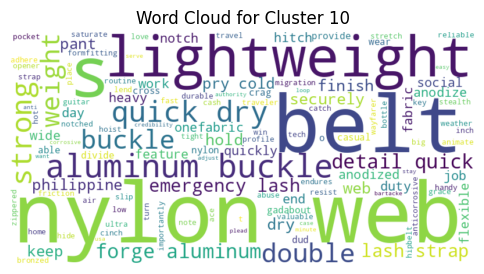

Cluster 10:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
98      O web belt  O web belt - A social gadabout  able to cross the divide between work wear, casual duds and a day at the crags. Quick-drying nylon (1 1/2" wide) provides a formfitting lightweight hitch that won't stretch even if you're caught in saturated weather. The belt's ultra-strong forged aluminum buckle holds securely and features a notched end for prying the top off a cold one.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing</li> <li>"Lightweight, forged aluminum buckle holds securely and fea...
136  Tech web belt  Tech web belt - This one's for the big jobs: hoisting heavy work pants, resisting migration under a hipbelt and most importantly, keeping everything in place during animated air-guitar routines. The belt's aluminum buckle is lightweight and strong and cinches tight for a reliable hitch; it's also handy as a bottle opener at the end of a hot day. The 1 1/2" nylon webbing endures abuse and dries quickly.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing doubles as emergency lash strap</li...
141    Travel belt  Travel belt - The traveler's ace  keeps your pants adhered and your valuables securely hidden. Made from fast-drying, heavy duty webbing with a zippered, 19-inch stealth pocket to hold your cash, key and a love note from home. With a no-slip anodized buckle that turns your belt into an emergency lashing strap.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing doubles as emergency lash strap</li> <li>Forged aluminum buckle is lightweight and strong</li> <li>"Anodized, anticorrosive finis...
421  Friction belt  Friction belt - The wayfarer's belt: lightweight, flexible and low profile with just enough social grace to lend credibility when you're pleading your case to the authorities. This flexible belt keeps pants where you want them with a 1" wide nylon webbing that stays put dries quickly and serves double-duty for any last-minute strapping jobs. It's looped and bartacked onto an easy-to-adjust anodized aluminum buckle.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing doubles as emergency l...

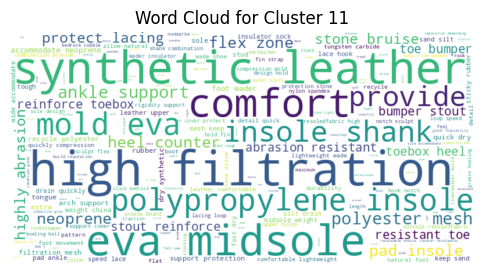

Cluster 11:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
112   Riverwalker  Riverwalker - felt - High water. Slick bedrock. Cobbles like greased bowling balls. Our Riverwalkers built their reputation in the most demanding wading conditions, with great flexibility, fast drying times and light weight. Notched flex zones allow for natural foot movement; a polypropylene insole/shank provides stability. But don't let the comfort fool you: These are tough boots for serious wading. Details: synthetic leather and high-filtration polyester mesh (100% recycled) uppers for max...
113   Riverwalker  Riverwalker - studded - High water. Slick bedrock. Cobbles like greased bowling balls. Our Riverwalkers built their reputation in the most demanding wading conditions, with great flexibility, fast drying times and light weight. Notched flex zones allow for natural foot movement; a polypropylene insole/shank provides stability. But don't let the comfort fool you: These are tough boots for serious wading. Details: synthetic leather and high-filtration polyester mesh (100% recycled) uppers for ...
135  Surf sneaker  Surf sneaker - The footwear of choice for chasing the beach blitz, poling canoes or in some cases, sprucing up for a wedding. The Surf Sneaker employs the same tried-and-true cupped midsole and tough outsole as the Marlwalker, but has a softer flex pattern for more give on boat decks and shore breaks. Light, comfortable and fast-drying, this style offers just the right amount of support and protection without weighing you down. Our high-filtration mesh uses 100% recycled polyester. Colors se...
397    Marlwalker  Marlwalker - Stalking the coral flats can be tough on feet and even tougher on emotions. Fortunately, our classic flats shoe provides the comfort, support and protection - at least for feet - every flats angler will appreciate. Light, flexible (with notched flex zones to allow for more natural foot movement) and fast drying, the Marlwalker is known for killer durability that's made it the favorite of flats guides everywhere. Boot-style protection and support reduce fatigue and maximize stabi...
419   Riverwalker  Riverwalker - sticky - High water. Slick bedrock. Cobbles like greased bowling balls. Our Riverwalkers built their reputation in the most demanding wading conditions, with great flexibility, fast drying times and light weight. Notched flex zones allow for natural foot movement; a polypropylene insole/shank provides stability. But don't let the comfort fool you: These are tough boots for serious wading. Details: synthetic leather and high-filtration polyester mesh (100% recycled) uppers for m...

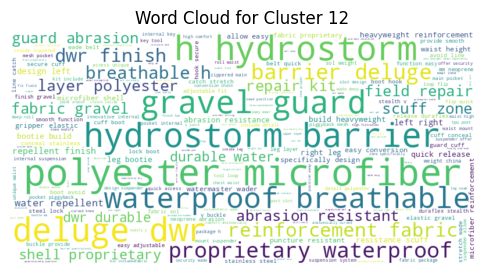

Cluster 12:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
149  Watermaster hip highs  Watermaster hip highs - Originally made for Midwest spring creek aficionados, the Watermaster Hip Highs are finding fans among backcountry trekkers, jetty scramblers, skinny water paddlers and other minimalist anglers. Rest assured, these are not your grandpa's floppy rubber hip boots, either. The Watermasters are made from our proprietary waterproof/breathable polyester microfiber fabric with H2No Hydrostorm barrier for durable, sweat-free performance. Quick-release buckle hip adjustments, ...
152     Watermaster waders  Watermaster waders - long - Blackberries, barbwire, basalt...the fact is, we ask a lot of our waders - most importantly, that they keep us dry through all sorts of abuse. The new version of our Watermaster Waders accomplishes this on a number of fronts: First, our proprietary waterproof/breathable polyester microfiber fabric package with H2No Hydrostorm barrier is quantitatively more puncture resistant than the competition. Then, because wet is wet, whether it comes from inside or out, we us...
153     Watermaster waders  Watermaster waders - short - Blackberries, barbwire, basalt...the fact is, we ask a lot of our waders - most importantly, that they keep us dry through all sorts of abuse. The new version of our Watermaster Waders accomplishes this on a number of fronts: First, our proprietary waterproof/breathable polyester microfiber fabric package with H2No Hydrostorm barrier is quantitatively more puncture resistant than the competition. Then, because wet is wet, whether it comes from inside or out, we u...
354     Watermaster waders  Watermaster waders - king - Blackberries, barbwire, basalt...the fact is, we ask a lot of our waders - most importantly, that they keep us dry through all sorts of abuse. The new version of our Watermaster Waders accomplishes this on a number of fronts: First, our proprietary waterproof/breathable polyester microfiber fabric package with H2No Hydrostorm barrier is quantitatively more puncture resistant than the competition. Then, because wet is wet, whether it comes from inside or out, we us...
366     Watermaster waders  Watermaster waders - reg - Blackberries, barbwire, basalt...the fact is, we ask a lot of our waders - most importantly, that they keep us dry through all sorts of abuse. The new version of our Watermaster Waders accomplishes this on a number of fronts: First, our proprietary waterproof/breathable polyester microfiber fabric package with H2No Hydrostorm barrier is quantitatively more puncture resistant than the competition. Then, because wet is wet, whether it comes from inside or out, we use...
454      Guidewater waders  Guidewater waders - king - We built our Guidewater Waders to be the toughest, most puncture-resistant waterproof/breathable wader on the planet. Of course, we couldn't just stop there. Nope. They also had to be extremely lightweight while offering a groundbreaking level of comfort and convenience. In other words, the ultimate wader. We started by strategically placing varying weights of our proprietary waterproof/breathable polyester microfiber fabric package with H2No Hydrostorm barrier acc...
467      Guidewater waders  Guidewater waders - reg - We built our Guidewater Waders to be the toughest, most puncture-resistant waterproof/breathable wader on the planet. Of course, we couldn't just stop there. Nope. They also had to be extremely lightweight while offering a groundbreaking level of comfort and conve

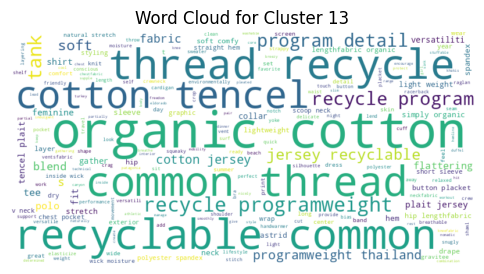

Cluster 13:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
46       Girl's cotton tank dress  Girl's cotton tank dress - This soft cotton dress feels breezy and cool, just like a day at the beach. Made of a lightweight 5-oz 100% organic cotton jersey-knit fabric that breathes naturally and rests smoothly against skin. The partially elasticized waist provides shape and a flattering fit; it also encourages a full range of mobility. The versatile tank-top styling layers nicely, and pleated handwarmer pockets and front gathering details create a flattering fit. The hemline is just above ...
127                 S/s stretch t  S/s stretch t - Ready for the full-body workout of an Eldorado Canyon lead, then quick-to-dry afterwards. Our Stretch Tees have a soft, yet technical plaited fabric blend of 55% organic cotton on the exterior with 35% polyester/10% spandex inside to wick moisture. The fit is slim and athletic with a Patagonia graphic screen-printed on the chest. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Plaited fabric has soft cotton exterior with polyester on th...
131                  Stretch polo  Stretch polo - Core to the nomadic lifestyle, our Stretch Polo is stuffable, sink-washable and quick-drying. Throw this polo shirt in a duffel, wear it at the crag or pair it with khakis for dinner. The plaited fabric combination of 55% organic cotton/35% polyester/10% spandex has a soft, indulgent exterior with a moisture-managing interior that keeps you dry. The supple collar protects your neck from determined gearslings. Recyclable through the Common Threads Recycling Program.<br><br><b>D...
161                   Astrid tank  Astrid tank - Conjure up Cardiff's shouldery waves with the Astrid Tank. The unbelievably soft, strappy tank has a flattering scoop neck and is made from our lightest weight organic cotton (55%)/Tencel jersey (45%) fabric blend. Feminine neck gathers and a wide-banded hem at the hip lend a flattering, drapy fit. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Our lightest weight organic cotton and Tencel blend</li> <li>Strappy tank with flattering scoo...
182                 Gravitee tank  Gravitee tank - The Gravitee's racerback and full shelf bra offer all the support and unrestricted movement of a traditional tank but in a bold and relaxed silhouette. The banded hem sits snugly on the hips, providing comfort under a harness and modesty during inverted poses. The Gravitee's light, breathable 54% organic cotton/41% Tencel/5% spandex blend and non-compression styling work together to keep the air circulating. Recyclable through the Common Threads Recycling Program.<br><br><b>D...
247           Simply organic polo  Simply organic polo - Like Trumpeter Swans, the Simply Organic Polo relishes a down-to-earth, graceful lifestyle. Made from 100% organic cotton jersey, this polo has natural stretch and classic styling that includes a 4-button placket and chest pocket. Notched, self-fabric cuffs lend durability; straight hem has side vents. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Organic cotton jersey</li> <li>4-button placket; notched self-fabric cuffs</li> <l...
248           Simply organic tank  Simply organic tank - Summer tanks take a beating; freshen up last year's crop with the Simply Organic Tank, now available in prints and solids. Wear the tank day or night, alone or layered, all year long. The organic cotton jersey has a nat

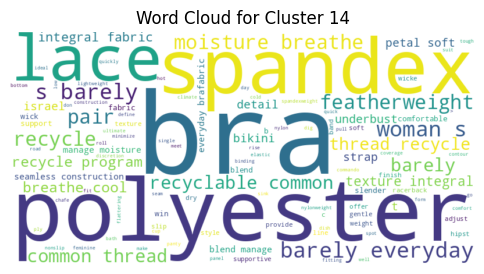

Cluster 14:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
164              Barely bikini  Barely bikini - Better than going commando, our petal-soft Barely Bikini wicks moisture and breathes to keep you comfortable with a feminine lace-like texture and seamless construction for ultimate comfort. Low-rise with the least coverage of our bottoms, this bikini style minimizes panty lines and single-ply elastic binding is featherweight and won't chafe. Made from a blend of 94% polyester (73% recycled)/6% spandex. Pairs with our Barely Bra and Barely Everyday Bra. Recyclable through the...
315           Barely bra (a/b)  Barely bra (a/b) - Featherweight yet supportive, our Barely Bra wicks moisture and breathes to keep you cool. The slender, nonslip straps adjust in the back; an underbust band provides gentle support. Lace-like texture is integral to the fabric. Made from a blend of 90% polyester (76% recycled)/6% spandex/4% nylon. Pairs with our Barely Bikini. .<br><br><b>Details:</b><ul> <li>Petal-soft and featherweight fabric blend manages moisture and breathes to keep you cool</li> <li>Seamless construct...
316  Barely everyday bra (b/c)  Barely everyday bra (b/c) - The flattering Barely Everyday Bra rolls with whatever the day dishes up. The bra's comfortable, pull-on racerback style has comfortable straps that won't dig. Underbust contour seams provide a supportive, defining fit; lined cups for discretion. Quick-dry, recycled fabric is ideal for on-the-road sink baths. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Petal-soft and lightweight recycled-polyester/spandex blend manages m...
317             Barely hipster  Barely hipster - The Barely Hipster's form-fitting construction has a soft, lace-like texture that breathes through tough spots. Featherweight recycled polyester/spandex (94%/6%) fabric blend wicks moisture and dries quickly, making it well-suited for hot or cold climates. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Soft and featherweight recycled-polyester/spandex blend manages moisture and  breathes to keep you cool</li> <li>Seamless construction...

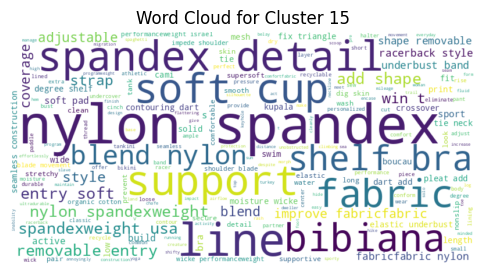

Cluster 15:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
155          Active mesh bra  Active mesh bra - Despite its inability to act as a belay slave, our Active Mesh Bra makes a perfect climbing partner. The body-conforming fabric provides fluid support and wicks moisture, while the seamless construction eliminates chafing. Comfortable nonslip straps won't dig into skin; they contour to a flattering V in back for unobstructed movement. The full-coverage design can go solo, or partner with layers. Made from 95% nylon mesh/5% spandex.<br><br><b>Details:</b><ul> <li>"Stretchy, ...
220    Solid bibiana 1 piece  Solid bibiana 1 piece - The sporty Bibiana One-Piece has racer-style shoulder straps with a keyhole back. It has a shelf bra with sewn-in soft pads, full back coverage and a lined front. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>T-back racer style</li> <li>Lined front</li> <li>Shelf bra with sewn-in soft cups</li> <li>Full back coverage</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(129 g 4.5 oz)<b...
221        Solid bibiana top  Solid bibiana top - The athletic Bibiana Top's racerback style won't impede shoulder blade movement when paddling or swimming. It has a lined front and an elastic underbust band for secure support. The low-cut front prevents water wash. With removable side-entry soft cups. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Racerback style</li> <li>Lined front</li> <li>Elastic underbust band for support</li> <li>Removable side-entry soft cups</li> <li>Improved fabric</...
232          Undercover cami  Undercover cami - Morph from water-logged sea creature back to land dweller effortlessly with the easy-wearing Undercover Cami. Made from an active-minded, stretchy 95% organic cotton/5% spandex blend that maintains its shape; the built-in shelf bra supports and contours while spaghetti-style straps won't dig into your skin. With hidden seams for a clean, smooth look. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Pre-washed, stretchy organic cotton"...
240    Print bibiana tankini  Print bibiana tankini - The Bibiana Tankini's racerback style won't impede shoulder blade movement and has a 360-degree shelf bra for secure support. Full-length coverage gives extra sun and rash protection. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Racerback style</li> <li>360-degree shelf bra</li> <li>Full length coverage</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(89 g 3.1 oz)<br><br>Made in ...
241        Print bibiana top  Print bibiana top - The athletic Bibiana Top's racerback style won't impede shoulder blade movement when paddling or swimming. It has a lined front and an elastic underbust band for secure support. The low-cut front prevents water wash. With removable side-entry soft cups. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Racerback style</li> <li>Lined front</li> <li>Elastic underbust band for support</li> <li>Removable side-entry soft cups</li> <li>Improved fabric</...
242  Print boucau halter top  Print boucau halter top - The Boucau has soft ties at the neck and back that adjust for a personalized fit. A wide underbust band offers ample support; contouring darts add shape. With removable soft pads and a smooth lining for a clean look. Made from a blend of 82% nylon/18

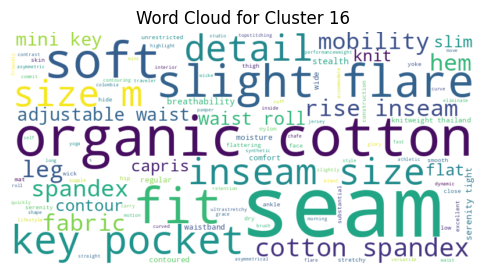

Cluster 16:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
204  Morning glory capris  Morning glory capris - Our most versatile capris, made of a supple, smooth-faced nylon/spandex knit (86%/14%), accommodate dynamic moves, wick moisture, and dry quickly. Contrast topstitching highlights the flattering details: asymmetrical side seams, a curved back yoke, a wide, flat waistband and contouring through the thighs. The legs have a straight, slim fit with a slight flare at the cuff. Inside, the brushed interior and flat-seam construction pampers the skin. Low rise. Inseam (size M...
214       Serenity tights  Serenity tights - long - Soft and stretchy for unrestricted mobility on the mat, our Serenity Tights are fitted close at the waist and through the hips and contour to a slight flare at the ankles. The adjustable waist rolls up or down and hides a mini key pocket. Made from an 8.6-oz 85% organic cotton/15% spandex knit. Inseam (size M) is 33".<br><br><b>Details:</b><ul> <li>"Soft, organic cotton for comfort and breathability, spandex for mobility"</li> <li>Adjustable waist rolls up or down</l...
245       Serenity capris  Serenity capris - For travelers committed to a carry-on lifestyle, these athletic capris have grace and style that go beyond the yoga studio. The Serenity's motion-friendly blend of organic cotton and spandex (85%/15%) has substantial give and excellent breathability. A wide, self-fabric waistband rolls up or down and has a stealth on-seam key pocket; the contoured side seams eliminate chafe; and the legs flare slightly at the hem. With a mini on-seam key pocket at the waist. Inseam (size M)...
246       Serenity tights  Serenity tights - Soft and stretchy for unrestricted mobility on the mat, our Serenity Tights are fitted close at the waist and through the hips and contour to a slight flare at the ankles. The adjustable waist rolls up or down and hides a mini key pocket. Made from an 8.6-oz 85% organic cotton/15% spandex knit. Inseam (size M) is 31".<br><br><b>Details:</b><ul> <li>"Soft, organic cotton for comfort and breathability, spandex for mobility"</li> <li>Adjustable waist rolls up or down</li> <li>...

In [75]:
# Group the data by cluster
grouped = data.groupby('cluster_db1')

cluster_dfs = {}
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)  # Set the width to a large value to prevent line wrapping issues

# Generate a word cloud and display the DataFrame for each cluster
for cluster_id, group in grouped:
    # Generate word cloud
    text = " ".join(nlp_ready for nlp_ready in group['nlp_ready'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the generated word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_id}')
    plt.axis("off")
    plt.show()

    # Create and display the DataFrame for the cluster
    cluster_df = group[['product_name', 'description']].copy()
    print(f"Cluster {cluster_id}:")
    display(cluster_df)
    print("\n")

In [368]:
# Group the data by cluster
grouped = data.groupby('cluster_db1')

# Create a DataFrame for each cluster
cluster_dfs = {}
for cluster_id, group in grouped:
    # Create a new DataFrame for the cluster with product_name and description
    cluster_df = group[['product_name', 'description']].copy()
    cluster_dfs[cluster_id] = cluster_df

# Set the display options to show the full content of the description column
pd.set_option('display.max_colwidth', None)  # Set to None to display full content
pd.set_option('display.width', 1000)  # Set the width to a large value to prevent line wrapping issues

# Print the DataFrames for each cluster
for cluster_id, cluster_df in cluster_dfs.items():
    print(f"Cluster {cluster_id}:")
    display(cluster_df)
    print("\n")

Cluster -1:


product_name  \
10         Baby sunshade top   
29       Cotton board shorts   
37       Elias fz sweatshirt   
38          Elias sweatshirt   
39             Fezzman shirt   
..                       ...   
428       Girl's beach skirt   
433  Girl's t-back one piece   
434     Girl's two-piece set   
438        Guidewater duffle   
491  Freedom to roam t-shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           description  
10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Baby sunshade top - Soft, stretchy polyester fabric is fast wicking, quick drying and breathable <br><br><b>Details:</b><ul> <li>Lap shoulders relax the silhouette </li> <li>Extended roll-down cuffs accommodate growth spurts; drop hem waist provides extra coverage</li></ul><br><br><b>Fabric: </b>4.3-oz 100% polyester jersey. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(0 g 0 oz)<br><br>Made in Vietnam.  
29                                                                                                                                                                                                                                                                                                                   Cotton board shorts - A classic in fabric and form, the 5.6-oz 100% organic cotton brushed canvas of these board shorts provides lightweight durability in and out of the water, with a pattern inspired by plantation-era cane field workshirts. A self-fabric waistband and flat-lying 2-button fly are cleanly styled, and the flapped patch pocket with metal button closure has double-needle stitched seams. Inseam (size 32) is 10"; outseam is 20". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>A Hawaiian classic i



Cluster 0:


product_name  \
0        Active classic boxers   
1    Active sport boxer briefs   
2          Active sport briefs   
17               Cap 1 bottoms   
18          Cap 1 boxer briefs   
..                         ...   
487         Cap 1 graphic crew   
493        Active boxer briefs   
494              Active briefs   
495              Cap 2 bottoms   
496                 Cap 2 crew   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                      Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><br>Made in Mexico.  
1                                                                                                                                                                                                                                                                                                                                                                                                       Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the se



Cluster 1:


product_name  \
3               Alpine guide pants   
4                  Alpine wind jkt   
5                 Ascensionist jkt   
8       Baby micro d-luxe cardigan   
11                  Baggies shorts   
..                             ...   
483          Borderless trek pants   
484  Borderless trek zip-off pants   
497                 All-time shell   
498          All-wear cargo shorts   
499                All-wear shorts   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Alpine guide pants - Skin in, climb ice, switch to rock, traverse a knife-edge ridge and boogie back down - these durable, weather-resistant and breathable soft-shell pants keep stride on every mountain endeavor. The midweight stretch-woven polyester won't restrict your moves, and the brushed interior maintains next-to-skin comfort. A 2-way zippered fly keeps things easy with a harness on, and the gusseted, zippered cuffs have 2-position snaps and tie-down loops. With water-resistant zippered pockets: two front, two thigh, one back hip. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Durable stretch-woven polyester (47% recycled) with DWR (durable water repellent) finish is water- and wind-resistant and highly breathable</li> <li>Brushed interior for next-to-skin comfort</li> <li>Waistband has belt loops and elastic on back</li> <li>2-way zippered fly</li> <li>"External pockets: two front slash, two glued-on thigh, one back hip - all with highly water-resistant, DWR-finished zippers"</li> <li>"Gusseted, zippered cuff with 2-position adjustable settings a



Cluster 2:


product_name  \
6                   Atom   
30             Crosstown   
41           Freewheeler   
52       Guidewater vest   
53    Highwater pfd vest   
54        Hip chest pack   
82      Lw travel duffel   
83        Lw travel pack   
92              Minimass   
93           Mlc wheelie   
103          Pocket pack   
130      Stormfront pack   
132  Stretch wading belt   
341     Riverwalker vest   
353          Single shot   
367            Pack vest   
388    Lw travel courier   
392      Lw travel sling   
393       Lw travel tote   
402             Hip pack   
420      Freewheeler max   
429                  Mlc   
430          Mlc burrito   
435            Lightwire   
436      Lightwire brief   
455        Critical mass   
463          Daily grind   
471          Double haul   
485            Half mass   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  
6                                                                                                                                                                                                                                                                                                                                                                                                                                        



Cluster 3:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description
7    Print banded betina btm                                                                                                              Print banded betina btm - Our fullest coverage bottoms, the Betina fits highest across the hips with a slightly scooped, lined front. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Fullest coverage bottom</li> <li>"Fits highest across hips, full front and back coverage"</li> <li>Regular rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in USA.
218          Solid adour btm                                                                                                                                                            Solid adour btm - Adours feature a scooped, low-rise front (lined) and medium coverage in back. Our improved fabric blend is made of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Medium coverage</li> <li>Lined front</li> <li>Slightly scooping front</li> <li>Low rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(43 g 1.5 oz)<br><br>Made in USA.
219         Solid betina btm                                                                                                        Solid betina btm - Our fullest coverage bottoms, the Betina fits highest across the hips with a slightly scooped, lined front. Made from a hard-wearing blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Fullest coverage bottom</li> <li>"Fits highest across hips, full front and back coverage"</li> <li>Regular rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in USA.
239        Print bayonne btm                                                                                                                 Print bayonne btm - The low-rise Bayonne Bottoms have adjustable side ties and minimal seat coverage - less than all of our other styles. Lined front. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Least coverage</li> <li>Lined front</li> <li>Adjustable side-tie closures</li> <li>Low rise</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(43 g 1.5 oz)<br><br>Made in USA.
253         Solid paries btm              Solid paries btm - The boy-short-style Paries Bottoms fit low and straight across the hips. With wide sides for comfort, a lined front and full seat coverage. Made from our improved fabric blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Boy-short style</li> <li>Lined front</li> <li>Fits low and straight across hips</li> <li>Updated waist styling</li> <li>Medium coverage in front; full back coverage</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(54 g 1.9 oz)<br><br>Made in USA.
254        Solid sunamee btm                                                                                                                                               Solid sunamee btm - Stay-put Sunamees fit straight across the hips, with full coverage in back. Lined front. Made from a formfitting blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Full coverage</li> <li>Lined front</li> <li



Cluster 4:


product_name  \
9    Baby sun bucket hat   
12          Beach bucket   
16            Bucket hat   
73              Logo hat   
134            Surf brim   
148         Velocity cap   
343       Velocity visor   
424        Trim brim hat   
448           Logo visor   
478           Bimini cap   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
9                                                                                                                                                                                                                                                                                      Baby sun bucket hat - This hat goes on when the sun rises above the horizon, and stays on when raindrops start falling. Its made from an ultra-durable 4-ply, 4.2-oz Supplex nylon fabric with a DWR (durable water repellent) finish, and reverses to either a contrasting solid color or print. A soft tuck-away chin strap with a hook-and-loop fastener holds securely without chafing young jawlines. Packs small; easy care.<br><br><b>Details:</b><ul> <li>"Lightweight Supplex nylon is soft, dries fast and packs small; easy care"</li> <li>Brim shields head and neck</li> <li>Chin strap with hook-and-loop fastener can be tucked away when not in use</li> <li>Reversible style with fun print/solid combinations</li> <li>One colorway has print on both sides</li></ul><br><br><b>Fabric: </b>"4-ply, 4.2-oz Supplex nylon with a DWR (durable water repellent) finish"<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in China.  
12                                                                                                                                    Beach bucket - Whenever you're at the junction of water and land, neutralize the sun's unforgiving rays with the wide brim and soft design of our versatile Beach Bucket. It has a durable, semi-rigid foam bill that is black underneath and casts refreshing 360-degree shade. The 6.8-oz 100% stretch-woven nylon fabric looks and feels like soft canvas, but provides water-shedding, fast-drying performance. Details: a moisture-wicking Coolmax headband, soft chin strap and an adjustable rear buckle for a reliable bond. Fabric 6.8-oz 100% stretch-woven nylon with DWR (durable water repellent) finish.<br><br><b>Details:</b><ul> <li>"Tough, easy care, stretch-woven nylon brim has durable, semi-rigid foam that floats"</li> <li>The bill provides 360-degree sun protection</li> <li>Black underbill to reduce glare</li> <li>Soft chin strap; moisture-wicking Coolmax headband; adjustable rear buckle</li></ul><br><br><b>Fabric: </b>6.8-oz 100% stretch-woven nylon with DWR (durable water repellent) finish<br><br><b>Weight: </b>(106 g 3.7 oz)<br><br>Made in China.  
16                                                                                                                    



Cluster 5:


product_name  \
13       Better sweater jkt   
61               El cap jkt   
65          Synch marsupial   
159            Aravis hoody   
160              Aravis jkt   
165      Better sweater jkt   
179              El cap jkt   
197        Mandeville hoody   
229              Synch vest   
278     Cotton fleece hoody   
308          Aravis 1/4 zip   
320              Synch vest   
373    Pique fleece 1/4 zip   
400   Reversible phone home   
403  Hooded monk sweatshirt   
458     Araveto 1/4 zip jkt   
459      Araveto hooded jkt   
460             Araveto jkt   
473     Baby synch cardigan   
474         Baby synch vest   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
13                                                                                                                                                                                                                                                              Better sweater jkt - June nights camped out in New Mexico's Navajo country are starry and cold. Layer up in the softest fleece we've spun to date. Made from high-performance, sweater-knit polyester fleece, the Better Sweater is warm as wool and technically proficient. The stand-up collar has a zipper garage, and handwarmer pockets keep your fingers cozy. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Soft fleece has a sweater-knit face, fleeced interior and heathered overdyed yarns"</li> <li>Stand-up collar and full zip with garage</li> <li>Raglan sleeves</li> <li>Handwarmer pockets</li></ul><br><br><b>Fabric: </b>9.5-oz 100% polyester with sweater-knit exterior and fleece interior. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(577 g 20 oz)<br><br>Made in Thailand.  
61                                                                                           El cap jkt - Resistant to hard play but irresistible against the skin, our El Cap Jacket is lightweight, quick-drying and way cozy. The 5.7-oz 100% polyester (78% recycled) double-faced fleece is brushed inside and provides moisture-wicking performance. The full-zip design has handwarmer pockets, raglan sleeves for mobility, spandex binding at the arms and waist for a secure fit and a reflective patch for high visibility between the shoulders. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Great versatile spring/summer full-zip jacket</li> <li>Contrast raglan sleeves</li> <li>Two handwarmers</li> <li>"Contrast spandex binding around zipper, sleeve cuffs and hem for a clean look"</li> <li>Reflective on center back</li></ul><br><br><b>Fabric: </b>5.7-oz 100% polyester (78% recycled) double-faced brushed fleece with moisture-wicking performance. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(271 g 9.4 oz)<br><br>Made in Colombia.  
65                                  



Cluster 6:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description
25            City by the sea t-shirt                                                                                                                                    City by the sea t-shirt - Illustrating the renaissance of sea-inspired, community living, artist Geoff McFetridge's work adorns the City-By-The-Sea T-Shirt. Lightweight, 100% organic cotton fabric is ringspun for softness. Taped shoulder seams prevent chafing. PVC- and phthalate-free inks are easier on the environment. The tee is Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</li> <li>Taped shoulder seams</li> <li>Screen-print inks are PVC- and phthalate-free</li></ul><br><br><b>Fabric: </b>4.4-oz 100% organic cotton. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(150 g 5.2 oz)<br><br>Made in USA.
35                   Dragoons t-shirt                                                                                           Dragoons t-shirt - These dragoons have dropped their weapons in favor of big wave guns. Artist Geoff McFetridge's work creates a peaceful quiver on the Dragoons T-Shirt. The tee is made from 100% organic cotton fabric; PVC- and phthalate-free screen print inks are easier on the environment. The lightweight tee has ringspun yarns and taped shoulder seams for a soft hand. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</li> <li>Taped shoulder seams</li> <li>Screen-print inks are PVC- and phthalate-free</li></ul><br><br><b>Fabric: </b>4.4-oz 100% organic cotton. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(150 g 5.2 oz)<br><br>Made in USA.
40                Fish frenzy t-shirt                                                                                          Fish frenzy t-shirt - Dependent on free-flowing currents, the Salmon's extraordinary cycle of life perseveres with the Fish Frenzy T-Shirt. Washington-based artist Nikki McClure's work appears on the tee's 100% organic cotton canvas. Ringspun fabric yarns and taped shoulder seams create a soft hand. PVC- and phthalate-free inks are easier on the environment. The shirt is recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Ringspun yarns for a softer hand</li> <li>Taped shoulder seams</li> <li>Screen-print inks are PVC- and phthalate-free</li></ul><br><br><b>Fabric: </b>5.4-oz 100% organic cotton. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(199 g 6.9 oz)<br><br>Made in USA.
55                    Iceberg t-shirt                                                                                                                                                                            Iceberg t-shirt - The effects of global warming run deep, depicted here on the Iceberg T-Shirt with artwork by wood block print artist Nick Wroblewski. Made from 100% ringspun organic cotton and printed with PVC- and phthalate-free inks, the shirt has taped shoulder seams for added comfort. Recy



Cluster 7:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description
47          Going big in b.c. poster                                                            Going big in b.c. poster - One mans trash is another mans treasure. Orry Grant taking it out on Trash Chutes. Nelson, B.C. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos available to you as posters. We hope they brighten up your space and inspire you to get outside.<br><br><b>Details:</b><ul> <li>Dimensions: 24 x 36</li> <li>"Photo by Steve Ogle ?2009 Patagonia, Inc."</li></ul><br><br><b>Fabric: </b>Printed with soy inks on 100% recycled paper<br><br>Printed in USA.
68      Lead an examined life poster                                                                                          Lead an examined life poster - Guanacos standing sentry in Patagonia, Chile. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos available to you as posters. We hope they brighten up your space and inspire you to get outside.<br><br><b>Details:</b><ul> <li>"Dimensions: 36"" x 24"""</li> <li>Photo by Terri Laine</li></ul><br><br><b>Fabric: </b>Printed with soy inks on recycled paper that contains 50% post-consumer waste<br><br>Printed in USA.
237          Wyoming climbing poster                                                                                                                            Wyoming climbing poster - Max Factor, 5.11c. Vedauwoo, Wyoming. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the walls of our retail stores and specialty outdoor clothiers around the world. And now we are excited to make select photos available to you as posters. We hope they brighten up your space and inspire you to get outside.<br><br><b>Details:</b><ul> <li>Dimensions: 24 x 36</li> <li>Photo by Jim Thornburg ?2009 Patagonia</li></ul><br><br><b>Fabric: </b>Printed with soy inks on 100% recycled paper<br><br>Printed in USA.
318              Symmetry w16 poster                                                                                 Symmetry w16 poster - Bill Serantoni ice climbs Fearful Symmetry in Alberta Canada. For 30 years we've paid tribute to human adventures both near and far with a collection of photographs that speak to the passion, joy and beauty of lives spent outside. These photos have appeared exclusively on our Web site, in our catalog and on the 



Cluster 8:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description
74   L/s hooded rashguard                                             L/s hooded rashguard - The 30-UPF fabric of our Long-Sleeved Rashguard keeps the sun from sizzling your skin. Made from a durable and protective blend of 84% all-recycled polyester/16% spandex. With seamless underarm gussets and chafe-free construction. The drawstring loop at front secures to board shorts.<br><br><b>Details:</b><ul> <li>All-recycled polyester rashguard has 30-UPF sun protection</li> <li>Sun-blocking 3-panel hood with built-in neoprene visor snugs with locking drawcord</li> <li>Rear zip-pocket stores surf/paddle essentials</li> <li>Seamless underarm gussets and flat-seam construction avoids chafe</li> <li>Self-loop at front hem secures to board shorts</li></ul><br><br><b>Fabric: </b>5.8-oz 84% all-recycled polyester/16% spandex<br><br><b>Weight: </b>(239 g 8.3 oz)<br><br>Made in USA.
76          L/s rashguard                                                           L/s rashguard - The 30-UPF fabric of our Long-Sleeved Rashguard keeps the sun from sizzling your skin. Made from a durable and protective blend of 84% all-recycled polyester/16% spandex. With seamless underarm gussets and chafe-free construction. The drawstring loop at front secures to board shorts.<br><br><b>Details:</b><ul> <li>Recycled polyester (100%) rashguard has 30-UPF sun protection </li> <li>Mock turtleneck protects neck from sun and rolls over to shield from wetsuit zipper</li> <li>Seamless underarm gussets and flat-seam construction avoids chafe</li> <li>Self-loop at front hem secures to board shorts</li> <li>Flying-fish graphic (only on fog)</li></ul><br><br><b>Fabric: </b>5.8-oz 84% all-recycled polyester/16% spandex<br><br><b>Weight: </b>(187 g 6.5 oz)<br><br>Made in USA.
194         L/s rashguard                                                                                                                                                                                                                       L/s rashguard - The 30-UPF fabric of our Long-Sleeved Rashguard keeps the sun from sizzling your skin. With a slim neckline, wide underarm panels and ergonomically placed seams. Made from a durable blend of 5.8-oz 84% all-recycled polyester/16% spandex.<br><br><b>Details:</b><ul> <li>Stretchy all-recycled polyester/spandex fabric offers protection against chafing and sun</li> <li>30-UPF sun protection</li> <li>Mock neck and set-in long sleeves with seamless underarm gussets and flat-seam construction</li></ul><br><br><b>Fabric: </b>5.8-oz 84% all-recycled polyester/16% spandex<br><br><b>Weight: </b>(164 g 5.7 oz)<br><br>Made in USA.
225         S/s rashguard                                                                                                                                              S/s rashguard - The 30-UPF fabric of our Short-Sleeved Rashguard keeps the sun from sizzling your skin. With a slim neckband, seamless underarm gussets and set-in sleeves for chafe-free paddling. Made from a soft fabric blend of 84% all-recycled polyester/16% spandex in solid colors that match our swimwear and board shor



Cluster 9:


product_name  \
78        Lw endurance ankle socks   
79      Lw endurance quarter socks   
80            Lw hiking crew socks   
86                   Merino 1 crew   
87                Merino 1 t-shirt   
88                   Merino 2 polo   
89                Merino 2 t-shirt   
147          Ulw hiking crew socks   
199       Merino 1 graphic t-shirt   
200                  Merino 1 tank   
201                  Merino 2 crew   
202                 Merino 2 dress   
259                  Merino 1 crew   
264               Merino 1 t-shirt   
265               Merino 2 bottoms   
268               Merino 2 t-shirt   
269                 Merino 3 pants   
337  Ultra hw mountaineering socks   
338   Ultra lw endurance ped socks   
382              Lw everyday socks   
384     Lw hiking crew liner socks   
405               Merino 2 bottoms   
406                  Merino 2 crew   
456           Mw hiking crew socks   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  
78                                                                                                                                                                                                                                                                                                                                                                                          Lw endurance ankle socks - Fast-forward pursuits, like riding the White Rim in a day, have miles of inspiration followed by moments of doubt. At least your feet will stay consistently cool with the airy performance of these endurance socks. Made from several fibers that are constructed to feel weightless, they merge 40% merino wool (chlorine-free) for comfort and cushion, 25% Coolmax/20% nylon/12% polyester for durability and moisture-management and 3% spandex for stretch and recovery. The full merino-wool channel-knit under the foot creates superior cushioning for heel and toes, as well as airflow for the arch. The looped Lintoe ensures chafe-free toe comfort. Height is 3".<br><br><b>Details:</b><ul> <li>"Lightweight, wool blend strategically knit for excellent breathability and wicking"</li> <li>"Full, channel-knit construction under the entire foot provides the most cushioning with the least bulk"</li> <li>Looped Lintoe construction creates the smallest and flattest seam possible for ultimate toe comfort</li> <li>Flex zones at toe for comfor



Cluster 10:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description
98      O web belt  O web belt - A social gadabout  able to cross the divide between work wear, casual duds and a day at the crags. Quick-drying nylon (1 1/2" wide) provides a formfitting lightweight hitch that won't stretch even if you're caught in saturated weather. The belt's ultra-strong forged aluminum buckle holds securely and features a notched end for prying the top off a cold one.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing</li> <li>"Lightweight, forged aluminum buckle holds securely and features a bronzed finish"</li> <li>Buckle is strong and durable; notched for prying the top off a cold one</li></ul><br><br><b>Fabric: </b>"1&#189;"" nylon webbing"<br><br><b>Weight: </b>(190 g 6.6 oz)<br><br>Made in Philippines.
136  Tech web belt           Tech web belt - This one's for the big jobs: hoisting heavy work pants, resisting migration under a hipbelt and most importantly, keeping everything in place during animated air-guitar routines. The belt's aluminum buckle is lightweight and strong and cinches tight for a reliable hitch; it's also handy as a bottle opener at the end of a hot day. The 1 1/2" nylon webbing endures abuse and dries quickly.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing doubles as emergency lash strap</li> <li>Forged aluminum buckle is lightweight and strong; notched for prying the top off a cold one</li></ul><br><br><b>Fabric: </b>"1 1/2"" nylon webbing"<br><br><b>Weight: </b>127 g (4.5 oz)<br><br>Made in Philippines.
141    Travel belt                                                                                              Travel belt - The traveler's ace  keeps your pants adhered and your valuables securely hidden. Made from fast-drying, heavy duty webbing with a zippered, 19-inch stealth pocket to hold your cash, key and a love note from home. With a no-slip anodized buckle that turns your belt into an emergency lashing strap.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing doubles as emergency lash strap</li> <li>Forged aluminum buckle is lightweight and strong</li> <li>"Anodized, anticorrosive finish on buckle"</li></ul><br><br><b>Fabric: </b>"1&#189;"" nylon webbing"<br><br><b>Weight: </b>(210 g 7.3 oz)<br><br>Made in Philippines.
421  Friction belt                                                          Friction belt - The wayfarer's belt: lightweight, flexible and low profile with just enough social grace to lend credibility when you're pleading your case to the authorities. This flexible belt keeps pants where you want them with a 1" wide nylon webbing that stays put dries quickly and serves double-duty for any last-minute strapping jobs. It's looped and bartacked onto an easy-to-adjust anodized aluminum buckle.<br><br><b>Details:</b><ul> <li>Quick-dry nylon webbing doubles as emergency lash strap</li> <li>"Anodized, anti-corrosive finish on buckle"</li></ul><br><br><b>Fabric: </b>"1"" nylon webbing"<br><br><b>Weight: </b>164 g (5.8 oz)<br><br>Made in USA.



Cluster 11:


product_name  \
112   Riverwalker   
113   Riverwalker   
135  Surf sneaker   
397    Marlwalker   
419   Riverwalker   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  
112                                                                                                          Riverwalker - felt - High water. Slick bedrock. Cobbles like greased bowling balls. Our Riverwalkers built their reputation in the most demanding wading conditions, with great flexibility, fast drying times and light weight. Notched flex zones allow for natural foot movement; a polypropylene insole/shank provides stability. But don't let the comfort fool you: These are tough boots for serious wading. Details: synthetic leather and high-filtration polyester mesh (100% recycled) uppers for maximum support, protected lacing, molded EVA midsole; our Rockstopper insole/shank stabilizes grip and protects against stone-bruising. Extra comfort thanks to the padded insole and ankle support; extra durability from the highly abrasion-resistant toe bumper with stout, reinforced toebox and heel counter. In three resoleable choices: felt (sewn on), tungsten-carbide studded and sticky rubber. Sized to accommodate neoprene stocking-foot waders.<br><br><b>Details:</b><ul> <li>"Quick-drying synthetic leather for a comfortable, lightweight wading shoe; high-filtration mesh keeps out sand and silt, and drains quickly"</li> <li>"Compression molded EVA midsole and polypropylene insole/shank combination provide rigidity, support and protection from stone bruising; padded insole for comfort and arch support"</li> <li>Wide last accommodates a neoprene foot wader or the Insulator Socks; padded ankle support</li> <li>"Covered, protected lacing loops with speed lace hooks at the top; notched, sculpted flex zones"</li> <li>"Highly abrasion resistant toe bumper with stout, reinforced toebox and heel counter, sole designed to hold fin straps"</li> <li>"Long-wea



Cluster 12:


product_name  \
149  Watermaster hip highs   
152     Watermaster waders   
153     Watermaster waders   
354     Watermaster waders   
366     Watermaster waders   
454      Guidewater waders   
467      Guidewater waders   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
149                                                                                                                                                                                                                              



Cluster 13:


product_name  \
46       Girl's cotton tank dress   
127                 S/s stretch t   
131                  Stretch polo   
161                   Astrid tank   
182                 Gravitee tank   
247           Simply organic polo   
248           Simply organic tank   
249            Simply organic tee   
295                 Versatili-tee   
296             Versatiliti cardi   
297              Versatiliti tank   
309                    Astrid top   
310                   Astrid wrap   
336                 L/s gravi-tee   
344              Versatiliti polo   
345               Versatiliti tee   
362  S/s squeaky clean polo shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
46   Girl's cotton tank dress - This soft cotton dress feels breezy and cool, just like a day at the beach. Made of a lightweight 5-oz 100% organic cotton jersey-knit fabric that breathes naturally and rests smoothly against skin. The partially elasticized waist provides shape and a flattering fit; it also encourages a full range of mobility. The versatile tank-top styling layers nicely, and pleated handwarmer pockets and front gathering details create a flattering fit. The hemline is just above the knees. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Soft organic cotton jersey knit</li> <li>Tank style great for layering or alone</li> <li>Partial elasticized waist gives shape and comfort for freedom of movement</li> <li>Handwarmer pockets</li> <li>Hem hits above knee</li></ul><br><br><b>Fabric: </b>5-oz 100% organic cotton jersey. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(158 g 5.5 oz)<br><br>Made in Turkey.  
127                                                                                                                                                                                                         S/s stretch t - Ready for the full-body workout of an Eldorado Canyon lead, then quick-to-dry afterwards. Our Stretch Tees have a soft, yet technical plaited fabric blend of 55% organic cotton on the exterior with 35% polyester/10% spandex inside to wick moisture. The fit is slim and athletic with a Patagonia graphic screen-printed on the chest. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Plaited fabric has soft cotton exterior with polyester on the inside to wick moisture away from skin</li> <li>Crewneck</li> <li>Graphic screen-print on chest</li></ul><br><br><b>Fabric: </b>5.7-oz 55% organic cotton/35% polyester/10% spandex. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>(181 g 6.3 oz)<br><br>Made in Thailand.  
131                                                                                                                                                                                Stretch polo - Core to the nomadic lifestyle, our Stretch Polo is stuffable, sink-washable and quick-drying. Throw this polo shirt in a duffel, wear it at the crag or



Cluster 14:


product_name  \
164              Barely bikini   
315           Barely bra (a/b)   
316  Barely everyday bra (b/c)   
317             Barely hipster   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  
164  Barely bikini - Better than going commando, our petal-soft Barely Bikini wicks moisture and breathes to keep you comfortable with a feminine lace-like texture and seamless construction for ultimate comfort. Low-rise with the least coverage of our bottoms, this bikini style minimizes panty lines and single-ply elastic binding is featherweight and won't chafe. Made from a blend of 94% polyester (73% recycled)/6% spandex. Pairs with our Barely Bra and Barely Everyday Bra. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Petal-soft and featherweight recycled-polyester/spandex blend manages moisture and breathes to keep you cool</li> <li>Seamless construction</li> <li>Lace-like texture is integral to fabric</li> <li>Pairs with our Women's Barely Bra and Women's Barely Everyday Bra</li></ul><br><br><b>Fabric: </b>"4.6-oz 94% polyester (73% recycled)/6% spandex, with a moisture-wicking finish. Recyclable through the Common Threads Recycling Program"<br><br><b>Weight: </b>(17 g 0.6 oz)<br><br>Made in Israel.  
315                                                                                                                                                                                Barely bra (a/b) - Featherweight yet supportive, our Barely Bra wicks moisture and breathes to keep you cool. The slender, nonslip straps adjust in the back; an underbust band provides gentle support. Lace-like texture is integral to the fabric. Made from a blend of 90% polyester (76% recycled)/6% spandex/4% nylon. Pairs with our Barely Bikini. .<br><br><b>Details:</b><ul> <li>Petal-soft and featherweight fabric blend manages moisture and breathes to keep you cool</li> <li>Seamless construction</li> <li>Underbust band offers gentle support</li> <li>V-front with slender straps that adjust in back and won't slip</li> <li>Lace-like texture is integral to fabric</li> <li>Pairs with our Women's Barely Bra and Barely Everyday Bra</li></ul><br><br><b>Fabric: </b>4.6-oz 90% polyester (76% recycled)/6% spandex/4% nylon<br><br><b>Weight: </b>(25 g 0.9 oz)<br><br>Made in Israel.  
316                                                                                                                                                             Barely everyday bra (b/c) - The flattering Barely Everyday Bra rolls with whatever the day dishes up. The bra's comfortable, pull-on racerback style has comfortable straps that won't dig. Underbust contour seams provide a supportive, defining fit; lined cups for discretion. Quick-dry, recycled fabric is ideal for on-the-road sink baths. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Petal-soft and lightweight recycled-polyester/spandex blend manages moistu



Cluster 15:


product_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description
155          Active mesh bra                  Active mesh bra - Despite its inability to act as a belay slave, our Active Mesh Bra makes a perfect climbing partner. The body-conforming fabric provides fluid support and wicks moisture, while the seamless construction eliminates chafing. Comfortable nonslip straps won't dig into skin; they contour to a flattering V in back for unobstructed movement. The full-coverage design can go solo, or partner with layers. Made from 95% nylon mesh/5% spandex.<br><br><b>Details:</b><ul> <li>"Stretchy, body-conforming nylon/spandex blend is ultradurable, supportive and wicks moisture to keep skin dry"</li> <li>Seamless construction</li> <li>"Comfortable, nonslip straps meet V-style in back"</li></ul><br><br><b>Fabric: </b>8.1-oz 95% nylon mesh/5% spandex with moisture-wicking performance<br><br><b>Weight: </b>(72 g 2.5 oz)<br><br>Made in Israel.
220    Solid bibiana 1 piece                                                                                                                                                                                                                                                                                                                                                             Solid bibiana 1 piece - The sporty Bibiana One-Piece has racer-style shoulder straps with a keyhole back. It has a shelf bra with sewn-in soft pads, full back coverage and a lined front. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>T-back racer style</li> <li>Lined front</li> <li>Shelf bra with sewn-in soft cups</li> <li>Full back coverage</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(129 g 4.5 oz)<br><br>Made in USA.
221        Solid bibiana top                                                                                                                                                                                                                                                            Solid bibiana top - The athletic Bibiana Top's racerback style won't impede shoulder blade movement when paddling or swimming. It has a lined front and an elastic underbust band for secure support. The low-cut front prevents water wash. With removable side-entry soft cups. Made from a blend of 82% nylon/18% spandex.<br><br><b>Details:</b><ul> <li>Racerback style</li> <li>Lined front</li> <li>Elastic underbust band for support</li> <li>Removable side-entry soft cups</li> <li>Improved fabric</li></ul><br><br><b>Fabric: </b>5.6-oz 82% nylon/18% spandex<br><br><b>Weight: </b>(51 g 1.8 oz)<br><br>Made in USA.
232          Undercover cami                                                                     Undercover cami - Morph from water-logged sea creature back to land dweller effortlessly with the easy-wearing Undercover Cami. Made from an active-minded, stretchy 95% organic cotton/5% spandex blend that maintains its shape; the built-in shelf bra supports and contours while spaghetti-style straps won't dig into your skin. With hidden seams for a 



Cluster 16:


product_name  \
204  Morning glory capris   
214       Serenity tights   
245       Serenity capris   
246       Serenity tights   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  
204  Morning glory capris - Our most versatile capris, made of a supple, smooth-faced nylon/spandex knit (86%/14%), accommodate dynamic moves, wick moisture, and dry quickly. Contrast topstitching highlights the flattering details: asymmetrical side seams, a curved back yoke, a wide, flat waistband and contouring through the thighs. The legs have a straight, slim fit with a slight flare at the cuff. Inside, the brushed interior and flat-seam construction pampers the skin. Low rise. Inseam (size M) is 24".<br><br><b>Details:</b><ul> <li>"Substantial, ultrastretchy and soft synthetic knit with excellent shape retention; wicks moisture and dries fast"</li> <li>"Flattering, wide, flat waistband"</li> <li>"Curved back-yoke detailing and asymmetric side seams, contoured fit through thigh, slight flare at hem"</li> <li>Flat-seam construction is soft against skin</li> <li>Low rise</li> <li>"Inseam (size M) is 24"""</li></ul><br><br><b>Fabric: </b>7-oz 86% nylon/14% spandex smooth-faced jersey with moisture-wicking performance<br><br><b>Weight: </b>232 g (8.2 oz)<br><br>Made in Colombia.  
214                                                                                                                                                                                                                                                                                                                   Serenity tights - long - Soft and stretchy for unrestricted mobility on the mat, our Serenity Tights are fitted close at the waist and through the hips and contour to a slight flare at the ankles. The adjustable waist rolls up or down and hides a mini key pocket. Made from an 8.6-oz 85% organic cotton/15% spandex knit. Inseam (size M) is 33".<br><br><b>Details:</b><ul> <li>"Soft, organic cotton for comfort and breathability, spandex for mobility"</li> <li>Adjustable waist rolls up or down</li> <li>On-seam stealth mini key-pocket at waist</li> <li>"Slim, contoured leg fit; slight flare at hem"</li> <li>Regular rise</li> <li>"Inseam is 33"""</li></ul><br><br><b>Fabric: </b>8.6-oz 85% organic cotton/15% spandex knit<br><br><b>Weight: </b>320 g (11.3 oz)<br><br>Made in Thailand.  
245                                                                                                                                           Serenity capris - For travelers committed to a carry-on lifestyle, these athletic capris have grace and style that go beyond the yoga studio. The Serenity's motion-friendly blend of organic cotton and spandex (85%/15%) has substantial give and excellent breathability. A wide, self-fabric waistband rolls up or down and has a stealth on-seam key pocket; the contoured side seams eliminate chafe; and the legs flare slightly at the 

If the word cloud doesn't help much in defining the content of each cluster, the description helps us confirm a logical grouping of products within a same cluster

# Part 2 - Recommender system

In [91]:
data[data["cluster_db1"]==5]

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description            product_name  \
13    14  Better sweater jkt - June nights camped out in New Mexico's Navajo country are starry and cold. Layer up in the softest fleece we've spun to date. Made from high-performance, sweater-knit polyester fleece, the Better Sweater is warm as wool and technically proficient. The stand-up collar has a zipper garage, and handwarmer pockets keep your fingers cozy. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Soft fleece has a sweater-knit face, fleeced inter...      Better sweater jkt   
61    62  El cap jkt - Resistant to hard play but irresistible against the skin, our El Cap Jacket is lightweight, quick-drying and way cozy. The 5.7-oz 100% polyester (78% recycled) double-faced fleece is brushed inside and provides moisture-wicking performance. The full-zip design has handwarmer pockets, raglan sleeves for mobility, spandex binding at the arms and waist for a secure fit and a reflective patch for high visibility between the shoulders. Recyclable through the Common Threads Recycling ...              El cap jkt   
65    66  Synch marsupial - The roomy kangaroo-style front pocket on the Kids' Synchilla Marsupial lets them take their rock, leaf and feather collection wherever they go. Made of ultra-soft 7.6-oz 100% polyester (85% recycled) double-faced fleece; it features a reflective collar stand for high visibility, a deep front zip, shape-holding elasticized cuffs and waist and a hand-me-down ID label inside. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Made from sof...         Synch marsupial   
159  160  Aravis hoody - The Lochsa River season ushers in snowmelt wavetrains and ice cream headaches. Warm up at the take-out with the Aravis Hoody - a cozy full-zip hooded cardigan made from exceptionally soft, brushed polyester. It has a shaped fit, Capilene-trimmed edges and a fitted hood. Pockets: two zippered handwarmers, a left-sleeve security and interior drop-ins. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>Made from cozy soft polyester fleece</li>...            Aravis hoody   
160  161  Aravis jkt - The highly adaptable Aravis Jacket eases the transition from icy hibernation to full-fledged charging. The lightweight jacket's dense, double-sided polyester fleece fabric (100%) is brushed for softness; Capilene 3 fabric trims the neck, pockets, cuffs and hem lending a clean style. Full front zipper and stand-up collar preserve warmth. Zippered handwarmer pockets shield chilled paws; interior drop-in pockets and zippered sleeve security pocket stash keys and snacks. Recyclable ...              Aravis jkt   
165  166  Better sweater jkt - The Better Sweater Jacket has all the lightweight, moisture-wicking warmth of a high-performance fleece but travels incognito as a dignified sweater. The richly textured, cross-dyed fabric has a soft fleece interior and a heathered sweater-knit face. Toasty Capilene 3 fabric trims the wind flap, cuffs, hem and pockets. With a stand-up collar, zippered handwarmer pockets, interior drop-in pockets and a zippered left-sleeve pocket. Recyclable through the Common Threads Rec...      Better sweater jkt   
179  180  El cap jkt - Stuff the El Cap Jacket into your pack on your next Winds walkabout - its lightweight, layerable nature makes it a classic. The double-faced and brushed polyester fleece (78% recycled) wicks moisture and dries quickly. The f

In [94]:
def find_similar_items(item_id):
    # Find the product name of the given item_id
    product_name = data.loc[data['id'] == item_id, 'product_name'].values[0]

    # Find the cluster of the given item_id
    cluster_id = data.loc[data['id'] == item_id, 'cluster_db1'].values[0]

    # Filter items in the same cluster
    similar_items = data[data['cluster_db1'] == cluster_id]

    # Exclude the input item_id itself
    similar_items = similar_items[similar_items['id'] != item_id]

    # Get the top 5 similar item names
    similar_product_names = similar_items['product_name'].head(5).tolist()

    return product_name, similar_product_names

# Use input() to allow the user to choose a product
item_id = int(input("Enter the item ID: "))
product_name, similar_product_names = find_similar_items(item_id)

# Create a list of similar products in Markdown format
similar_products_list = "\n".join([f"- {product}" for product in similar_product_names])

# Display the suggestion using Markdown
display(Markdown(f"If you liked **{product_name}**, you may also like:\n{similar_products_list}"))

Enter the item ID: 459


If you liked **Araveto 1/4 zip jkt**, you may also like:
- Better sweater jkt
- El cap jkt
- Synch marsupial
- Aravis hoody
- Aravis jkt

# Part 3 : Topic modeling